In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import os

np.random.seed(42)
os.chdir('../')

## 1.- Cargando datos

In [2]:
from src.utils import load_data
import numpy as np

def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)

img_data, label_data = load_data()
images = np.array(img_data)
images = images/255
labels = np.array(label_data)

idx = shuffle_along_axis(np.arange(600), 0)

Loading ../InsulatorsDataSet/03 Extraction/ images...
Loading ../InsulatorsDataSet/04 Extraction/ images...
Loading ../InsulatorsDataSet/05 Extraction/ images...
Loading ../InsulatorsDataSet/06 Extraction/ images...
Loading ../InsulatorsDataSet/07 Extraction/ images...
Loading ../InsulatorsDataSet/08 Extraction/ images...


### 1.1.- Separando en distintos datasets

In [3]:
N_VALIDATION = 108
N_TRAIN = 432
N_TEST = 60

X_train = images[idx[:N_TRAIN+N_VALIDATION]]
y_train = labels[idx[:N_TRAIN+N_VALIDATION]]

X_test = images[idx[N_TRAIN+N_VALIDATION:]]
y_test = labels[idx[N_TRAIN+N_VALIDATION:]]


## 2.- Definición modelo SVM
Utilizando SGDclassifier y haciendo un GridSearch cross-validation teniendo como parámetro el alpha

In [83]:
linear_classifier = SGDClassifier(random_state=0, loss='hinge', max_iter=100, verbose=1, alpha=1, validation_fraction=0.2)

parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10, verbose=3)
searcher.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 18085.86, NNZs: 633722, Bias: -1.388972, T: 486, Avg. loss: 21113.457306
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 20637.23, NNZs: 633888, Bias: -111.617640, T: 972, Avg. loss: 8901.663230
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 22169.46, NNZs: 633625, Bias: -200.632399, T: 1458, Avg. loss: 3829.044676
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 22259.69, NNZs: 633770, Bias: -173.717253, T: 1944, Avg. loss: 4769.719836
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 21860.48, NNZs: 633874, Bias: -173.201814, T: 2430, Avg. loss: 1425.466952
Total training time: 1.68 seconds.
-- Epoch 6
Norm: 20939.18, NNZs: 633782, Bias: -173.179151, T: 2916, Avg. loss: 438.534883
Total training time: 1.98 seconds.
-- Epoch 7
Norm: 19811.53, NNZs: 633782, Bias: -173.179151, T: 3402, Avg. loss: 0.000000
Total training time: 2.28 seconds.
-- Epoch 8
Norm: 18799.12, NNZs: 633782, Bias: -173.179151, T: 3888, Avg. loss: 0.000000
Total training time: 2.59 sec

Norm: 18724.80, NNZs: 634000, Bias: -52.778768, T: 3402, Avg. loss: 0.000000
Total training time: 2.27 seconds.
-- Epoch 8
Norm: 17767.93, NNZs: 634000, Bias: -52.778768, T: 3888, Avg. loss: 0.000000
Total training time: 2.59 seconds.
-- Epoch 9
Norm: 16904.10, NNZs: 634000, Bias: -52.778768, T: 4374, Avg. loss: 0.000000
Total training time: 2.88 seconds.
-- Epoch 10
Norm: 16120.37, NNZs: 634000, Bias: -52.778768, T: 4860, Avg. loss: 0.000000
Total training time: 3.17 seconds.
-- Epoch 11
Norm: 15406.09, NNZs: 634000, Bias: -52.778768, T: 5346, Avg. loss: 0.000000
Total training time: 3.49 seconds.
Convergence after 11 epochs took 3.49 seconds
[CV 1/10] END ..........alpha=1e-05, loss=hinge;, score=0.778 total time=  25.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 19023.28, NNZs: 633988, Bias: -15.823158, T: 486, Avg. loss: 23598.072327
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 22377.54, NNZs: 633985, Bias: -96.188303, T: 972, Avg. loss: 9695.656131
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 21134.87, NNZs: 634007, Bias: -124.427927, T: 1458, Avg. loss: 2736.532986
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 21865.61, NNZs: 633664, Bias: -152.382322, T: 1944, Avg. loss: 3017.243396
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 21864.34, NNZs: 633639, Bias: -152.624278, T: 2430, Avg. loss: 1525.107071
Total training time: 1.57 seconds.
-- Epoch 6
Norm: 21763.70, NNZs: 634006, Bias: -237.362687, T: 2916, Avg. loss: 1568.012572
Total training time: 1.87 seconds.
-- Epoch 7
Norm: 20591.64, NNZs: 634006, Bias: -237.362687, T: 3402, Avg. loss: 0.000000
Total training time: 2.16 seconds.
-- Epoch 8
Norm: 19539.37, NNZs: 634006, Bias: -237.362687, T: 3888, Avg. loss: 0.000000
Total training time: 2.45 se

Norm: 18925.70, NNZs: 634009, Bias: 228.678108, T: 3888, Avg. loss: 0.000000
Total training time: 2.43 seconds.
-- Epoch 9
Norm: 18005.58, NNZs: 634009, Bias: 228.678108, T: 4374, Avg. loss: 0.000000
Total training time: 2.72 seconds.
-- Epoch 10
Norm: 17170.78, NNZs: 634009, Bias: 228.678108, T: 4860, Avg. loss: 0.000000
Total training time: 3.02 seconds.
-- Epoch 11
Norm: 16409.96, NNZs: 634009, Bias: 228.678108, T: 5346, Avg. loss: 0.000000
Total training time: 3.31 seconds.
-- Epoch 12
Norm: 15713.70, NNZs: 634009, Bias: 228.678108, T: 5832, Avg. loss: 0.000000
Total training time: 3.60 seconds.
Convergence after 12 epochs took 3.60 seconds
[CV 2/10] END ..........alpha=1e-05, loss=hinge;, score=0.833 total time=  23.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 18509.36, NNZs: 633897, Bias: -169.508300, T: 486, Avg. loss: 23820.203581
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 21385.43, NNZs: 633033, Bias: -170.319295, T: 972, Avg. loss: 10728.191054
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 22031.81, NNZs: 633595, Bias: -316.103534, T: 1458, Avg. loss: 7070.547861
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 22648.43, NNZs: 633512, Bias: -261.323365, T: 1944, Avg. loss: 3832.564265
Total training time: 1.30 seconds.
-- Epoch 5
Norm: 22476.17, NNZs: 633006, Bias: -313.044269, T: 2430, Avg. loss: 1864.914794
Total training time: 1.61 seconds.
-- Epoch 6
Norm: 21513.76, NNZs: 633948, Bias: -349.089651, T: 2916, Avg. loss: 356.593371
Total training time: 1.90 seconds.
-- Epoch 7
Norm: 20355.16, NNZs: 633948, Bias: -349.089651, T: 3402, Avg. loss: 0.000000
Total training time: 2.20 seconds.
-- Epoch 8
Norm: 19314.97, NNZs: 633948, Bias: -349.089651, T: 3888, Avg. loss: 0.000000
Total training time: 2.50 

Norm: 23630.71, NNZs: 634009, Bias: 191.794441, T: 1458, Avg. loss: 2965.106075
Total training time: 0.97 seconds.
-- Epoch 4
Norm: 22195.66, NNZs: 634007, Bias: 205.639361, T: 1944, Avg. loss: 225.463291
Total training time: 1.27 seconds.
-- Epoch 5
Norm: 20870.54, NNZs: 634008, Bias: 205.335658, T: 2430, Avg. loss: 70.284817
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 19689.86, NNZs: 634006, Bias: 193.373096, T: 2916, Avg. loss: 2.134005
Total training time: 1.85 seconds.
-- Epoch 7
Norm: 18633.76, NNZs: 634006, Bias: 204.689905, T: 3402, Avg. loss: 16.298664
Total training time: 2.14 seconds.
-- Epoch 8
Norm: 17761.25, NNZs: 634006, Bias: 194.159614, T: 3888, Avg. loss: 14.797109
Total training time: 2.43 seconds.
-- Epoch 9
Norm: 16904.42, NNZs: 634009, Bias: 204.671088, T: 4374, Avg. loss: 3.103373
Total training time: 2.72 seconds.
-- Epoch 10
Norm: 16120.67, NNZs: 634009, Bias: 204.671088, T: 4860, Avg. loss: 0.000000
Total training time: 3.01 seconds.
-- Epoch 11
Norm: 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 19511.20, NNZs: 633528, Bias: -14.724314, T: 486, Avg. loss: 25200.704954
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 24355.87, NNZs: 633970, Bias: -60.960466, T: 972, Avg. loss: 12045.495041
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 25772.68, NNZs: 633978, Bias: -178.150257, T: 1458, Avg. loss: 5884.112914
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 25004.78, NNZs: 633990, Bias: -219.937063, T: 1944, Avg. loss: 1101.866492
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 23894.60, NNZs: 633982, Bias: -206.038238, T: 2430, Avg. loss: 1585.309111
Total training time: 1.63 seconds.
-- Epoch 6
Norm: 22766.85, NNZs: 633992, Bias: -218.309056, T: 2916, Avg. loss: 486.824527
Total training time: 1.92 seconds.
-- Epoch 7
Norm: 21540.77, NNZs: 633992, Bias: -218.309056, T: 3402, Avg. loss: 0.000000
Total training time: 2.22 seconds.
-- Epoch 8
Norm: 20439.99, NNZs: 633992, Bias: -218.309056, T: 3888, Avg. loss: 0.000000
Total training time: 2.52 se

Norm: 21727.55, NNZs: 634002, Bias: 129.027006, T: 972, Avg. loss: 6440.873390
Total training time: 0.66 seconds.
-- Epoch 3
Norm: 22181.43, NNZs: 634007, Bias: 173.024684, T: 1458, Avg. loss: 2529.442336
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 21617.41, NNZs: 634007, Bias: 201.313955, T: 1944, Avg. loss: 1267.846535
Total training time: 1.26 seconds.
-- Epoch 5
Norm: 20422.57, NNZs: 634010, Bias: 227.381938, T: 2430, Avg. loss: 46.345391
Total training time: 1.55 seconds.
-- Epoch 6
Norm: 19260.13, NNZs: 634010, Bias: 227.381938, T: 2916, Avg. loss: 0.000000
Total training time: 1.85 seconds.
-- Epoch 7
Norm: 18222.90, NNZs: 634010, Bias: 227.381938, T: 3402, Avg. loss: 0.000000
Total training time: 2.14 seconds.
-- Epoch 8
Norm: 17291.68, NNZs: 634010, Bias: 227.381938, T: 3888, Avg. loss: 0.000000
Total training time: 2.43 seconds.
-- Epoch 9
Norm: 16451.00, NNZs: 634010, Bias: 227.381938, T: 4374, Avg. loss: 0.000000
Total training time: 2.72 seconds.
-- Epoch 10
Norm: 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 18265.79, NNZs: 633865, Bias: -70.343154, T: 486, Avg. loss: 21389.758660
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 20850.43, NNZs: 633852, Bias: -103.807576, T: 972, Avg. loss: 6705.318724
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 23682.73, NNZs: 633833, Bias: -204.818202, T: 1458, Avg. loss: 5935.349106
Total training time: 1.13 seconds.
-- Epoch 4
Norm: 23991.29, NNZs: 633985, Bias: -178.028190, T: 1944, Avg. loss: 2885.549074
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 23866.82, NNZs: 633960, Bias: -216.427250, T: 2430, Avg. loss: 2402.779145
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 23433.31, NNZs: 633926, Bias: -240.641542, T: 2916, Avg. loss: 818.716727
Total training time: 2.13 seconds.
-- Epoch 7
Norm: 22171.33, NNZs: 633926, Bias: -240.641542, T: 3402, Avg. loss: 0.000000
Total training time: 2.44 seconds.
-- Epoch 8
Norm: 21038.33, NNZs: 633926, Bias: -240.641542, T: 3888, Avg. loss: 0.000000
Total training time: 2.74 se

Norm: 18707.40, NNZs: 633985, Bias: 117.586656, T: 486, Avg. loss: 22064.449405
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 20663.10, NNZs: 634008, Bias: 163.593051, T: 972, Avg. loss: 7911.030327
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 21189.81, NNZs: 634008, Bias: 163.125608, T: 1458, Avg. loss: 2733.341888
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 20061.76, NNZs: 634008, Bias: 149.015304, T: 1944, Avg. loss: 190.748028
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 19203.52, NNZs: 634010, Bias: 136.472059, T: 2430, Avg. loss: 103.688237
Total training time: 1.64 seconds.
-- Epoch 6
Norm: 18952.09, NNZs: 634010, Bias: 148.428829, T: 2916, Avg. loss: 1238.960304
Total training time: 1.95 seconds.
-- Epoch 7
Norm: 18360.44, NNZs: 634010, Bias: 159.424716, T: 3402, Avg. loss: 422.432450
Total training time: 2.26 seconds.
-- Epoch 8
Norm: 17427.33, NNZs: 634010, Bias: 148.800448, T: 3888, Avg. loss: 8.937399
Total training time: 2.57 seconds.
-- Epoch 9

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   25.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 18304.69, NNZs: 630139, Bias: -153.417049, T: 486, Avg. loss: 26036.204307
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 21726.95, NNZs: 632957, Bias: -247.247575, T: 972, Avg. loss: 9759.294616
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 25109.54, NNZs: 633017, Bias: -351.754819, T: 1458, Avg. loss: 5710.206468
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 24502.83, NNZs: 633446, Bias: -378.527985, T: 1944, Avg. loss: 2879.259712
Total training time: 1.43 seconds.
-- Epoch 5
Norm: 23374.10, NNZs: 633378, Bias: -403.924682, T: 2430, Avg. loss: 629.859856
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 23169.86, NNZs: 633653, Bias: -440.754081, T: 2916, Avg. loss: 3004.811348
Total training time: 2.11 seconds.
-- Epoch 7
Norm: 22229.63, NNZs: 633772, Bias: -440.831389, T: 3402, Avg. loss: 368.326484
Total training time: 2.51 seconds.
-- Epoch 8
Norm: 21093.65, NNZs: 633772, Bias: -440.831389, T: 3888, Avg. loss: 0.000000
Total training time: 2.86

Norm: 20522.85, NNZs: 634010, Bias: 277.099312, T: 2916, Avg. loss: 772.107223
Total training time: 1.94 seconds.
-- Epoch 7
Norm: 19725.48, NNZs: 634002, Bias: 265.446276, T: 3402, Avg. loss: 213.762098
Total training time: 2.24 seconds.
-- Epoch 8
Norm: 18717.47, NNZs: 634002, Bias: 265.446276, T: 3888, Avg. loss: 0.000000
Total training time: 2.54 seconds.
-- Epoch 9
Norm: 17807.47, NNZs: 634002, Bias: 265.446276, T: 4374, Avg. loss: 0.000000
Total training time: 2.85 seconds.
-- Epoch 10
Norm: 16981.86, NNZs: 634002, Bias: 265.446276, T: 4860, Avg. loss: 0.000000
Total training time: 3.15 seconds.
-- Epoch 11
Norm: 16229.41, NNZs: 634002, Bias: 265.446276, T: 5346, Avg. loss: 0.000000
Total training time: 3.45 seconds.
-- Epoch 12
Norm: 15540.81, NNZs: 634002, Bias: 265.446276, T: 5832, Avg. loss: 0.000000
Total training time: 3.76 seconds.
-- Epoch 13
Norm: 14908.27, NNZs: 634002, Bias: 265.446276, T: 6318, Avg. loss: 0.000000
Total training time: 4.06 seconds.
Convergence after 1

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 18436.27, NNZs: 631798, Bias: -84.035071, T: 486, Avg. loss: 23440.317202
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 19942.07, NNZs: 633188, Bias: -193.407983, T: 972, Avg. loss: 6895.933962
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 22202.77, NNZs: 633589, Bias: -252.641246, T: 1458, Avg. loss: 6366.216204
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 22262.97, NNZs: 633976, Bias: -239.418708, T: 1944, Avg. loss: 3852.007903
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 22157.13, NNZs: 633329, Bias: -303.240873, T: 2430, Avg. loss: 1784.961238
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 21504.94, NNZs: 634008, Bias: -304.104760, T: 2916, Avg. loss: 1553.320971
Total training time: 1.97 seconds.
-- Epoch 7
Norm: 20677.47, NNZs: 634010, Bias: -292.758392, T: 3402, Avg. loss: 102.754040
Total training time: 2.27 seconds.
-- Epoch 8
Norm: 19885.39, NNZs: 633987, Bias: -304.026149, T: 3888, Avg. loss: 293.520550
Total training time: 2.

Norm: 20501.43, NNZs: 634002, Bias: 134.275477, T: 486, Avg. loss: 24502.525411
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 22016.69, NNZs: 634010, Bias: 212.382298, T: 972, Avg. loss: 7969.545878
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 22691.76, NNZs: 634006, Bias: 241.103372, T: 1458, Avg. loss: 2373.904078
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 23557.74, NNZs: 634009, Bias: 310.162477, T: 1944, Avg. loss: 2129.714871
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 22257.28, NNZs: 634009, Bias: 309.511293, T: 2430, Avg. loss: 103.799792
Total training time: 1.63 seconds.
-- Epoch 6
Norm: 20990.42, NNZs: 634009, Bias: 309.511293, T: 2916, Avg. loss: 0.000000
Total training time: 1.93 seconds.
-- Epoch 7
Norm: 19860.00, NNZs: 634009, Bias: 309.511293, T: 3402, Avg. loss: 0.000000
Total training time: 2.24 seconds.
-- Epoch 8
Norm: 18845.12, NNZs: 634009, Bias: 309.511293, T: 3888, Avg. loss: 0.000000
Total training time: 2.54 seconds.
-- Epoch 9
Nor

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 18531.01, NNZs: 633660, Bias: -119.409525, T: 486, Avg. loss: 21873.057717
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 21959.64, NNZs: 633656, Bias: -199.660229, T: 972, Avg. loss: 9022.647130
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 22730.66, NNZs: 633767, Bias: -316.427675, T: 1458, Avg. loss: 5384.463935
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 22838.98, NNZs: 634002, Bias: -303.010729, T: 1944, Avg. loss: 2536.579904
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 22461.59, NNZs: 634007, Bias: -341.722077, T: 2430, Avg. loss: 1578.613162
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 22458.52, NNZs: 633996, Bias: -366.301927, T: 2916, Avg. loss: 1270.683462
Total training time: 1.97 seconds.
-- Epoch 7
Norm: 21249.04, NNZs: 633996, Bias: -366.301927, T: 3402, Avg. loss: 0.000000
Total training time: 2.27 seconds.
-- Epoch 8
Norm: 20163.18, NNZs: 633996, Bias: -366.301927, T: 3888, Avg. loss: 0.000000
Total training time: 2.57 

Norm: 14994.96, NNZs: 633941, Bias: 114.548595, T: 3888, Avg. loss: 0.000000
Total training time: 2.52 seconds.
-- Epoch 9
Norm: 14265.94, NNZs: 633941, Bias: 114.548595, T: 4374, Avg. loss: 0.000000
Total training time: 2.82 seconds.
-- Epoch 10
Norm: 13604.52, NNZs: 633941, Bias: 114.548595, T: 4860, Avg. loss: 0.000000
Total training time: 3.13 seconds.
-- Epoch 11
Norm: 13001.72, NNZs: 633941, Bias: 114.548595, T: 5346, Avg. loss: 0.000000
Total training time: 3.43 seconds.
Convergence after 11 epochs took 3.43 seconds
[CV 8/10] END ..........alpha=1e-05, loss=hinge;, score=0.852 total time=  22.8s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 19052.08, NNZs: 633977, Bias: -188.380113, T: 486, Avg. loss: 22717.747551
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 22063.92, NNZs: 633963, Bias: -266.472941, T: 972, Avg. loss: 12268.719627
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 21926.73, NNZs: 633926, Bias: -309.512736, T: 1458, Avg. loss: 2588.159479
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 23188.91, NNZs: 633936, Bias: -337.408105, T: 1944, Avg. loss: 4154.129891
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 23365.75, NNZs: 633964, Bias: -338.890736, T: 2430, Avg. loss: 3719.656692
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 22052.11, NNZs: 633964, Bias: -350.753958, T: 2916, Avg. loss: 13.232791
Total training time: 1.97 seconds.
-- Epoch 7
Norm: 21149.18, NNZs: 633964, Bias: -350.747634, T: 3402, Avg. loss: 226.379146
Total training time: 2.27 seconds.
-- Epoch 8
Norm: 20623.76, NNZs: 633846, Bias: -372.324812, T: 3888, Avg. loss: 557.117405
Total training time: 2.

Norm: 18066.32, NNZs: 634010, Bias: 161.449488, T: 4374, Avg. loss: 0.000000
Total training time: 2.86 seconds.
-- Epoch 10
Norm: 17228.71, NNZs: 634010, Bias: 161.449488, T: 4860, Avg. loss: 0.000000
Total training time: 3.17 seconds.
-- Epoch 11
Norm: 16465.32, NNZs: 634010, Bias: 161.449488, T: 5346, Avg. loss: 0.000000
Total training time: 3.47 seconds.
-- Epoch 12
Norm: 15766.71, NNZs: 634010, Bias: 161.449488, T: 5832, Avg. loss: 0.000000
Total training time: 3.78 seconds.
Convergence after 12 epochs took 3.78 seconds
[CV 9/10] END ..........alpha=1e-05, loss=hinge;, score=0.870 total time=  22.9s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 17843.22, NNZs: 633234, Bias: -18.768006, T: 486, Avg. loss: 21718.008015
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 22155.94, NNZs: 633160, Bias: -159.337786, T: 972, Avg. loss: 12197.163737
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 24388.88, NNZs: 632991, Bias: -173.637226, T: 1458, Avg. loss: 7922.051896
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 24672.90, NNZs: 633552, Bias: -270.309937, T: 1944, Avg. loss: 3604.074279
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 23902.67, NNZs: 633753, Bias: -269.881256, T: 2430, Avg. loss: 716.167638
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 22542.15, NNZs: 633753, Bias: -269.881256, T: 2916, Avg. loss: 0.000000
Total training time: 1.97 seconds.
-- Epoch 7
Norm: 21328.17, NNZs: 633753, Bias: -269.881256, T: 3402, Avg. loss: 0.000000
Total training time: 2.27 seconds.
-- Epoch 8
Norm: 20238.26, NNZs: 633753, Bias: -269.881256, T: 3888, Avg. loss: 0.000000
Total training time: 2.58 seco

Norm: 20887.34, NNZs: 634009, Bias: 217.575085, T: 2916, Avg. loss: 0.707563
Total training time: 2.09 seconds.
-- Epoch 7
Norm: 19762.47, NNZs: 634009, Bias: 217.575085, T: 3402, Avg. loss: 0.000000
Total training time: 2.43 seconds.
-- Epoch 8
Norm: 18752.57, NNZs: 634009, Bias: 217.575085, T: 3888, Avg. loss: 0.000000
Total training time: 2.76 seconds.
-- Epoch 9
Norm: 17840.87, NNZs: 634009, Bias: 217.575085, T: 4374, Avg. loss: 0.000000
Total training time: 3.07 seconds.
-- Epoch 10
Norm: 17013.71, NNZs: 634009, Bias: 217.575085, T: 4860, Avg. loss: 0.000000
Total training time: 3.37 seconds.
-- Epoch 11
Norm: 16259.85, NNZs: 634009, Bias: 217.575085, T: 5346, Avg. loss: 0.000000
Total training time: 3.68 seconds.
-- Epoch 12
Norm: 15569.96, NNZs: 634009, Bias: 217.575085, T: 5832, Avg. loss: 0.000000
Total training time: 3.99 seconds.
Convergence after 12 epochs took 3.99 seconds
[CV 10/10] END .........alpha=1e-05, loss=hinge;, score=0.815 total time=  24.1s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7439.45, NNZs: 633618, Bias: -3.786018, T: 486, Avg. loss: 10474.025958
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 6904.64, NNZs: 633869, Bias: -44.551938, T: 972, Avg. loss: 3329.956818
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 6388.64, NNZs: 633991, Bias: -72.901763, T: 1458, Avg. loss: 1212.476075
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 5722.94, NNZs: 633930, Bias: -65.803748, T: 1944, Avg. loss: 1269.965370
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 5133.56, NNZs: 633944, Bias: -65.482749, T: 2430, Avg. loss: 352.612686
Total training time: 1.70 seconds.
-- Epoch 6
Norm: 4566.73, NNZs: 633940, Bias: -65.471548, T: 2916, Avg. loss: 98.457637
Total training time: 2.01 seconds.
-- Epoch 7
Norm: 4062.43, NNZs: 633940, Bias: -65.471548, T: 3402, Avg. loss: 0.000000
Total training time: 2.31 seconds.
-- Epoch 8
Norm: 3658.43, NNZs: 633940, Bias: -65.471548, T: 3888, Avg. loss: 0.000000
Total training time: 2.62 seconds.
-- Epoch 9


Norm: 3457.75, NNZs: 634007, Bias: -31.143735, T: 3888, Avg. loss: 0.000000
Total training time: 2.55 seconds.
-- Epoch 9
Norm: 3144.99, NNZs: 634007, Bias: -31.143735, T: 4374, Avg. loss: 0.000000
Total training time: 2.86 seconds.
-- Epoch 10
Norm: 2884.12, NNZs: 634007, Bias: -31.143735, T: 4860, Avg. loss: 0.000000
Total training time: 3.16 seconds.
-- Epoch 11
Norm: 2663.21, NNZs: 634007, Bias: -31.143735, T: 5346, Avg. loss: 0.000000
Total training time: 3.47 seconds.
Convergence after 11 epochs took 3.47 seconds
[CV 1/10] END .........alpha=0.0001, loss=hinge;, score=0.778 total time=  23.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7825.05, NNZs: 633786, Bias: -5.806311, T: 486, Avg. loss: 11501.412425
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 7486.90, NNZs: 633965, Bias: -37.080170, T: 972, Avg. loss: 3604.048254
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 6090.50, NNZs: 633932, Bias: -45.115872, T: 1458, Avg. loss: 883.330679
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 5621.62, NNZs: 633919, Bias: -53.017209, T: 1944, Avg. loss: 821.437677
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 5134.46, NNZs: 633916, Bias: -53.154077, T: 2430, Avg. loss: 363.724049
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 4763.94, NNZs: 633878, Bias: -61.512809, T: 2916, Avg. loss: 345.064363
Total training time: 1.96 seconds.
-- Epoch 7
Norm: 4241.45, NNZs: 633878, Bias: -63.858025, T: 3402, Avg. loss: 0.810103
Total training time: 2.26 seconds.
-- Epoch 8
Norm: 3912.79, NNZs: 633993, Bias: -70.289779, T: 3888, Avg. loss: 141.068784
Total training time: 2.57 seconds.
-- Epoch 9

Norm: 5244.95, NNZs: 634010, Bias: 84.208304, T: 2430, Avg. loss: 230.405765
Total training time: 1.63 seconds.
-- Epoch 6
Norm: 4597.48, NNZs: 634010, Bias: 81.571869, T: 2916, Avg. loss: 2.213085
Total training time: 1.93 seconds.
-- Epoch 7
Norm: 4089.78, NNZs: 634010, Bias: 81.571869, T: 3402, Avg. loss: 0.000000
Total training time: 2.23 seconds.
-- Epoch 8
Norm: 3683.06, NNZs: 634010, Bias: 81.571869, T: 3888, Avg. loss: 0.000000
Total training time: 2.54 seconds.
-- Epoch 9
Norm: 3349.92, NNZs: 634010, Bias: 81.571869, T: 4374, Avg. loss: 0.000000
Total training time: 2.84 seconds.
-- Epoch 10
Norm: 3072.05, NNZs: 634010, Bias: 81.571869, T: 4860, Avg. loss: 0.000000
Total training time: 3.14 seconds.
-- Epoch 11
Norm: 2836.74, NNZs: 634010, Bias: 81.571869, T: 5346, Avg. loss: 0.000000
Total training time: 3.45 seconds.
-- Epoch 12
Norm: 2634.92, NNZs: 634010, Bias: 81.571869, T: 5832, Avg. loss: 0.000000
Total training time: 3.75 seconds.
Convergence after 12 epochs took 3.75 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7589.69, NNZs: 633999, Bias: -77.572448, T: 486, Avg. loss: 12587.978137
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 6884.79, NNZs: 633847, Bias: -94.912850, T: 972, Avg. loss: 2489.050383
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 6357.81, NNZs: 634003, Bias: -106.784536, T: 1458, Avg. loss: 2024.620147
Total training time: 1.12 seconds.
-- Epoch 4
Norm: 5854.98, NNZs: 634008, Bias: -95.382948, T: 1944, Avg. loss: 857.525481
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 5337.97, NNZs: 634009, Bias: -104.717470, T: 2430, Avg. loss: 751.640308
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 4741.65, NNZs: 634009, Bias: -113.148985, T: 2916, Avg. loss: 134.383077
Total training time: 2.07 seconds.
-- Epoch 7
Norm: 4368.85, NNZs: 634005, Bias: -118.009531, T: 3402, Avg. loss: 68.205400
Total training time: 2.44 seconds.
-- Epoch 8
Norm: 3934.38, NNZs: 634005, Bias: -118.009531, T: 3888, Avg. loss: 0.000000
Total training time: 2.77 seconds.
-- E

Norm: 7799.58, NNZs: 634006, Bias: 62.055669, T: 972, Avg. loss: 3273.001711
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 6809.73, NNZs: 634010, Bias: 75.261706, T: 1458, Avg. loss: 925.459710
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 5706.47, NNZs: 634010, Bias: 79.107318, T: 1944, Avg. loss: 63.533260
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 4901.08, NNZs: 634010, Bias: 78.925864, T: 2430, Avg. loss: 16.972337
Total training time: 1.64 seconds.
-- Epoch 6
Norm: 4294.26, NNZs: 634007, Bias: 76.249205, T: 2916, Avg. loss: 0.547007
Total training time: 1.94 seconds.
-- Epoch 7
Norm: 3820.92, NNZs: 634007, Bias: 78.622810, T: 3402, Avg. loss: 3.347131
Total training time: 2.24 seconds.
-- Epoch 8
Norm: 3456.45, NNZs: 634007, Bias: 76.570686, T: 3888, Avg. loss: 2.965268
Total training time: 2.55 seconds.
-- Epoch 9
Norm: 3145.05, NNZs: 634010, Bias: 78.615676, T: 4374, Avg. loss: 0.525651
Total training time: 2.85 seconds.
-- Epoch 10
Norm: 2884.17, NNZs: 6340

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   25.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 8025.76, NNZs: 633797, Bias: -3.541383, T: 486, Avg. loss: 12228.318484
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 8148.79, NNZs: 633963, Bias: -19.474092, T: 972, Avg. loss: 4467.713316
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 7426.99, NNZs: 633996, Bias: -55.862213, T: 1458, Avg. loss: 1849.360197
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 6428.69, NNZs: 633994, Bias: -67.603742, T: 1944, Avg. loss: 298.444690
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 5611.23, NNZs: 634000, Bias: -63.794542, T: 2430, Avg. loss: 384.314270
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 4965.33, NNZs: 633990, Bias: -66.630611, T: 2916, Avg. loss: 112.598006
Total training time: 1.98 seconds.
-- Epoch 7
Norm: 4417.01, NNZs: 633990, Bias: -66.630611, T: 3402, Avg. loss: 0.000000
Total training time: 2.28 seconds.
-- Epoch 8
Norm: 3977.75, NNZs: 633990, Bias: -66.630611, T: 3888, Avg. loss: 0.000000
Total training time: 2.58 seconds.
-- Epoch 9


Norm: 6392.09, NNZs: 634008, Bias: 64.361097, T: 1458, Avg. loss: 781.770382
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 5557.81, NNZs: 634010, Bias: 72.532607, T: 1944, Avg. loss: 340.555625
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 4795.89, NNZs: 634010, Bias: 79.094612, T: 2430, Avg. loss: 11.390943
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 4200.54, NNZs: 634010, Bias: 79.094612, T: 2916, Avg. loss: 0.000000
Total training time: 1.93 seconds.
-- Epoch 7
Norm: 3736.67, NNZs: 634010, Bias: 79.094612, T: 3402, Avg. loss: 0.000000
Total training time: 2.23 seconds.
-- Epoch 8
Norm: 3365.07, NNZs: 634010, Bias: 79.094612, T: 3888, Avg. loss: 0.000000
Total training time: 2.53 seconds.
-- Epoch 9
Norm: 3060.69, NNZs: 634010, Bias: 79.094612, T: 4374, Avg. loss: 0.000000
Total training time: 2.84 seconds.
-- Epoch 10
Norm: 2806.81, NNZs: 634010, Bias: 79.094612, T: 4860, Avg. loss: 0.000000
Total training time: 3.14 seconds.
-- Epoch 11
Norm: 2591.82, NNZs: 6340

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7513.47, NNZs: 633919, Bias: -38.108354, T: 486, Avg. loss: 10433.528100
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 6975.97, NNZs: 633949, Bias: -52.288268, T: 972, Avg. loss: 2500.369156
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 6824.73, NNZs: 633977, Bias: -82.590357, T: 1458, Avg. loss: 1840.641485
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 6168.13, NNZs: 634006, Bias: -75.569684, T: 1944, Avg. loss: 781.636611
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 5604.71, NNZs: 633996, Bias: -84.970352, T: 2430, Avg. loss: 590.656106
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 5110.68, NNZs: 633983, Bias: -90.476156, T: 2916, Avg. loss: 188.214873
Total training time: 1.98 seconds.
-- Epoch 7
Norm: 4546.31, NNZs: 633983, Bias: -90.476156, T: 3402, Avg. loss: 0.000000
Total training time: 2.28 seconds.
-- Epoch 8
Norm: 4094.19, NNZs: 633983, Bias: -90.476156, T: 3888, Avg. loss: 0.000000
Total training time: 2.58 seconds.
-- Epoch 9

Norm: 2352.46, NNZs: 634010, Bias: 66.727983, T: 8262, Avg. loss: 0.000000
Total training time: 5.33 seconds.
Convergence after 17 epochs took 5.33 seconds
-- Epoch 1
Norm: 7695.12, NNZs: 634008, Bias: 52.774909, T: 486, Avg. loss: 10667.789828
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 6913.29, NNZs: 634010, Bias: 68.457185, T: 972, Avg. loss: 2970.542274
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 6106.33, NNZs: 634010, Bias: 68.038430, T: 1458, Avg. loss: 833.524330
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 5157.85, NNZs: 634010, Bias: 63.980841, T: 1944, Avg. loss: 50.445764
Total training time: 1.31 seconds.
-- Epoch 5
Norm: 4509.62, NNZs: 634010, Bias: 60.994887, T: 2430, Avg. loss: 24.889688
Total training time: 1.61 seconds.
-- Epoch 6
Norm: 4133.35, NNZs: 634010, Bias: 63.667627, T: 2916, Avg. loss: 278.805199
Total training time: 1.92 seconds.
-- Epoch 7
Norm: 3764.88, NNZs: 634010, Bias: 65.902163, T: 3402, Avg. loss: 90.757408
Total training time:

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   25.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7529.47, NNZs: 632867, Bias: -73.128014, T: 486, Avg. loss: 12703.686736
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 7269.23, NNZs: 633772, Bias: -107.248526, T: 972, Avg. loss: 3576.733739
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 7235.89, NNZs: 633913, Bias: -140.964855, T: 1458, Avg. loss: 1742.121746
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 6299.65, NNZs: 633927, Bias: -147.982411, T: 1944, Avg. loss: 773.322963
Total training time: 1.50 seconds.
-- Epoch 5
Norm: 5565.56, NNZs: 633844, Bias: -150.911590, T: 2430, Avg. loss: 292.427557
Total training time: 1.84 seconds.
-- Epoch 6
Norm: 4979.20, NNZs: 633874, Bias: -153.700636, T: 2916, Avg. loss: 151.865295
Total training time: 2.18 seconds.
-- Epoch 7
Norm: 4429.35, NNZs: 633874, Bias: -153.700636, T: 3402, Avg. loss: 0.000000
Total training time: 2.51 seconds.
-- Epoch 8
Norm: 3988.86, NNZs: 633874, Bias: -153.700636, T: 3888, Avg. loss: 0.000000
Total training time: 2.84 seconds.
-- 

Norm: 3358.35, NNZs: 634010, Bias: 101.103960, T: 4374, Avg. loss: 0.000000
Total training time: 2.93 seconds.
-- Epoch 10
Norm: 3079.78, NNZs: 634010, Bias: 101.103960, T: 4860, Avg. loss: 0.000000
Total training time: 3.24 seconds.
-- Epoch 11
Norm: 2843.88, NNZs: 634010, Bias: 101.103960, T: 5346, Avg. loss: 0.000000
Total training time: 3.55 seconds.
-- Epoch 12
Norm: 2641.55, NNZs: 634010, Bias: 101.103960, T: 5832, Avg. loss: 0.000000
Total training time: 3.86 seconds.
-- Epoch 13
Norm: 2466.10, NNZs: 634010, Bias: 101.103960, T: 6318, Avg. loss: 0.000000
Total training time: 4.17 seconds.
Convergence after 13 epochs took 4.17 seconds
[CV 6/10] END .........alpha=0.0001, loss=hinge;, score=0.870 total time=  24.9s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7583.59, NNZs: 633305, Bias: -37.192517, T: 486, Avg. loss: 11255.004957
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 6672.06, NNZs: 633940, Bias: -76.800945, T: 972, Avg. loss: 2487.231939
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 6398.24, NNZs: 633874, Bias: -95.535340, T: 1458, Avg. loss: 1960.257111
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 5723.78, NNZs: 633964, Bias: -92.122943, T: 1944, Avg. loss: 1023.977566
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 5203.22, NNZs: 633899, Bias: -107.705474, T: 2430, Avg. loss: 446.530325
Total training time: 1.71 seconds.
-- Epoch 6
Norm: 4690.12, NNZs: 634002, Bias: -108.146426, T: 2916, Avg. loss: 356.453834
Total training time: 2.03 seconds.
-- Epoch 7
Norm: 4239.99, NNZs: 634007, Bias: -105.759766, T: 3402, Avg. loss: 21.743677
Total training time: 2.34 seconds.
-- Epoch 8
Norm: 3869.82, NNZs: 633993, Bias: -108.102330, T: 3888, Avg. loss: 58.631879
Total training time: 2.65 seconds.
-- 

Norm: 7366.17, NNZs: 634009, Bias: 88.750090, T: 972, Avg. loss: 2889.842873
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 6639.16, NNZs: 634009, Bias: 101.294712, T: 1458, Avg. loss: 908.486469
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 5823.29, NNZs: 634009, Bias: 105.378078, T: 1944, Avg. loss: 337.750679
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 5101.28, NNZs: 634010, Bias: 111.560407, T: 2430, Avg. loss: 94.799959
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 4695.51, NNZs: 634010, Bias: 111.502340, T: 2916, Avg. loss: 168.459952
Total training time: 1.98 seconds.
-- Epoch 7
Norm: 4239.53, NNZs: 634010, Bias: 111.502888, T: 3402, Avg. loss: 51.798559
Total training time: 2.29 seconds.
-- Epoch 8
Norm: 3817.92, NNZs: 634010, Bias: 111.502888, T: 3888, Avg. loss: 0.000000
Total training time: 2.60 seconds.
-- Epoch 9
Norm: 3472.58, NNZs: 634010, Bias: 111.502888, T: 4374, Avg. loss: 0.000000
Total training time: 2.91 seconds.
-- Epoch 10
Norm: 3184.53,

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7622.56, NNZs: 633937, Bias: -56.880943, T: 486, Avg. loss: 10684.395665
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 7347.08, NNZs: 633990, Bias: -88.051607, T: 972, Avg. loss: 3207.772300
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 6550.37, NNZs: 633973, Bias: -123.998633, T: 1458, Avg. loss: 1645.925065
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 5871.87, NNZs: 634001, Bias: -120.460846, T: 1944, Avg. loss: 692.286394
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 5274.72, NNZs: 634008, Bias: -130.065976, T: 2430, Avg. loss: 395.089948
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 4898.09, NNZs: 634007, Bias: -135.749608, T: 2916, Avg. loss: 287.823134
Total training time: 1.97 seconds.
-- Epoch 7
Norm: 4357.19, NNZs: 634007, Bias: -135.749608, T: 3402, Avg. loss: 0.000000
Total training time: 2.27 seconds.
-- Epoch 8
Norm: 3923.88, NNZs: 634007, Bias: -135.749608, T: 3888, Avg. loss: 0.000000
Total training time: 2.58 seconds.
-- E

Norm: 2654.16, NNZs: 634008, Bias: 45.953638, T: 4374, Avg. loss: 0.000000
Total training time: 2.82 seconds.
-- Epoch 10
Norm: 2434.00, NNZs: 634008, Bias: 45.953638, T: 4860, Avg. loss: 0.000000
Total training time: 3.13 seconds.
-- Epoch 11
Norm: 2247.57, NNZs: 634008, Bias: 45.953638, T: 5346, Avg. loss: 0.000000
Total training time: 3.43 seconds.
Convergence after 11 epochs took 3.43 seconds
[CV 8/10] END .........alpha=0.0001, loss=hinge;, score=0.870 total time=  22.7s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7836.90, NNZs: 633969, Bias: -92.074945, T: 486, Avg. loss: 11143.785901
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 7424.74, NNZs: 633873, Bias: -124.914347, T: 972, Avg. loss: 3913.137883
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 6715.18, NNZs: 633950, Bias: -146.259535, T: 1458, Avg. loss: 1830.388881
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 5851.88, NNZs: 633926, Bias: -153.363392, T: 1944, Avg. loss: 920.695586
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 5490.03, NNZs: 633978, Bias: -149.664399, T: 2430, Avg. loss: 1210.208675
Total training time: 1.68 seconds.
-- Epoch 6
Norm: 4812.83, NNZs: 633982, Bias: -149.526968, T: 2916, Avg. loss: 5.268036
Total training time: 1.98 seconds.
-- Epoch 7
Norm: 4281.35, NNZs: 633982, Bias: -149.526968, T: 3402, Avg. loss: 0.000000
Total training time: 2.28 seconds.
-- Epoch 8
Norm: 3855.58, NNZs: 633982, Bias: -149.526968, T: 3888, Avg. loss: 0.000000
Total training time: 2.59 seconds.
-- E

Norm: 3361.22, NNZs: 634010, Bias: 65.419277, T: 4374, Avg. loss: 0.000000
Total training time: 2.95 seconds.
-- Epoch 10
Norm: 3082.41, NNZs: 634010, Bias: 65.419277, T: 4860, Avg. loss: 0.000000
Total training time: 3.25 seconds.
-- Epoch 11
Norm: 2846.31, NNZs: 634010, Bias: 65.419277, T: 5346, Avg. loss: 0.000000
Total training time: 3.55 seconds.
-- Epoch 12
Norm: 2643.81, NNZs: 634010, Bias: 65.419277, T: 5832, Avg. loss: 0.000000
Total training time: 3.86 seconds.
Convergence after 12 epochs took 3.86 seconds
[CV 9/10] END .........alpha=0.0001, loss=hinge;, score=0.852 total time=  23.7s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 7339.65, NNZs: 633826, Bias: -12.567003, T: 486, Avg. loss: 10569.826116
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 7412.76, NNZs: 633926, Bias: -63.371893, T: 972, Avg. loss: 4420.751178
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 7028.22, NNZs: 633857, Bias: -67.484019, T: 1458, Avg. loss: 2486.856080
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 6343.37, NNZs: 633995, Bias: -94.259231, T: 1944, Avg. loss: 981.370962
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 5613.13, NNZs: 633946, Bias: -94.006448, T: 2430, Avg. loss: 180.925189
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 4916.33, NNZs: 633946, Bias: -94.006448, T: 2916, Avg. loss: 0.000000
Total training time: 1.97 seconds.
-- Epoch 7
Norm: 4373.42, NNZs: 633946, Bias: -94.006448, T: 3402, Avg. loss: 0.000000
Total training time: 2.27 seconds.
-- Epoch 8
Norm: 3938.49, NNZs: 633946, Bias: -94.006448, T: 3888, Avg. loss: 0.000000
Total training time: 2.58 seconds.
-- Epoch 9
N

Norm: 6718.44, NNZs: 634005, Bias: 107.710667, T: 1458, Avg. loss: 993.271048
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 5882.26, NNZs: 634009, Bias: 92.770433, T: 1944, Avg. loss: 548.263584
Total training time: 1.32 seconds.
-- Epoch 5
Norm: 5196.41, NNZs: 634010, Bias: 96.156559, T: 2430, Avg. loss: 242.702570
Total training time: 1.63 seconds.
-- Epoch 6
Norm: 4555.42, NNZs: 634010, Bias: 93.296147, T: 2916, Avg. loss: 0.253912
Total training time: 1.93 seconds.
-- Epoch 7
Norm: 4052.37, NNZs: 634010, Bias: 93.296147, T: 3402, Avg. loss: 0.000000
Total training time: 2.24 seconds.
-- Epoch 8
Norm: 3649.37, NNZs: 634010, Bias: 93.296147, T: 3888, Avg. loss: 0.000000
Total training time: 2.54 seconds.
-- Epoch 9
Norm: 3319.28, NNZs: 634010, Bias: 93.296147, T: 4374, Avg. loss: 0.000000
Total training time: 2.84 seconds.
-- Epoch 10
Norm: 3043.94, NNZs: 634010, Bias: 93.296147, T: 4860, Avg. loss: 0.000000
Total training time: 3.15 seconds.
-- Epoch 11
Norm: 2810.79, NNZs: 63

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1666.74, NNZs: 633960, Bias: -6.634347, T: 486, Avg. loss: 3963.054358
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 1184.60, NNZs: 633954, Bias: -14.574702, T: 972, Avg. loss: 657.194861
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 960.16, NNZs: 633812, Bias: -19.212614, T: 1458, Avg. loss: 197.595396
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 794.15, NNZs: 634005, Bias: -18.214500, T: 1944, Avg. loss: 180.457386
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 675.17, NNZs: 633988, Bias: -17.763473, T: 2430, Avg. loss: 47.361991
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 578.07, NNZs: 633907, Bias: -18.127566, T: 2916, Avg. loss: 13.089519
Total training time: 1.96 seconds.
-- Epoch 7
Norm: 499.57, NNZs: 633907, Bias: -18.127566, T: 3402, Avg. loss: 0.000000
Total training time: 2.26 seconds.
-- Epoch 8
Norm: 439.84, NNZs: 633907, Bias: -18.127566, T: 3888, Avg. loss: 0.000000
Total training time: 2.57 seconds.
-- Epoch 9
Norm: 392.8

Norm: 339.02, NNZs: 634010, Bias: -15.606065, T: 4860, Avg. loss: 0.000000
Total training time: 3.16 seconds.
-- Epoch 11
Norm: 309.19, NNZs: 634010, Bias: -15.606065, T: 5346, Avg. loss: 0.000000
Total training time: 3.47 seconds.
-- Epoch 12
Norm: 284.18, NNZs: 634010, Bias: -15.606065, T: 5832, Avg. loss: 0.000000
Total training time: 3.77 seconds.
Convergence after 12 epochs took 3.77 seconds
[CV 1/10] END ..........alpha=0.001, loss=hinge;, score=0.796 total time=  23.2s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1753.13, NNZs: 633616, Bias: -1.427891, T: 486, Avg. loss: 4110.632138
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 1284.50, NNZs: 633512, Bias: -7.873738, T: 972, Avg. loss: 705.308062
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 915.35, NNZs: 633635, Bias: -9.048047, T: 1458, Avg. loss: 146.674150
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 780.09, NNZs: 633938, Bias: -10.218253, T: 1944, Avg. loss: 118.529069
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 675.38, NNZs: 633976, Bias: -10.242273, T: 2430, Avg. loss: 48.275039
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 618.32, NNZs: 633892, Bias: -11.672635, T: 2916, Avg. loss: 73.702487
Total training time: 1.98 seconds.
-- Epoch 7
Norm: 534.43, NNZs: 633846, Bias: -11.352515, T: 3402, Avg. loss: 0.399849
Total training time: 2.28 seconds.
-- Epoch 8
Norm: 470.53, NNZs: 633846, Bias: -11.352515, T: 3888, Avg. loss: 0.000000
Total training time: 2.59 seconds.
-- Epoch 9
Norm: 420.28,

Norm: 395.51, NNZs: 634008, Bias: 19.435001, T: 4374, Avg. loss: 0.000000
Total training time: 2.84 seconds.
-- Epoch 10
Norm: 357.35, NNZs: 634008, Bias: 19.435001, T: 4860, Avg. loss: 0.000000
Total training time: 3.16 seconds.
-- Epoch 11
Norm: 325.90, NNZs: 634008, Bias: 19.435001, T: 5346, Avg. loss: 0.000000
Total training time: 3.46 seconds.
-- Epoch 12
Norm: 299.54, NNZs: 634008, Bias: 19.435001, T: 5832, Avg. loss: 0.000000
Total training time: 3.76 seconds.
Convergence after 12 epochs took 3.76 seconds
[CV 2/10] END ..........alpha=0.001, loss=hinge;, score=0.852 total time=  23.3s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1700.39, NNZs: 633885, Bias: -23.889379, T: 486, Avg. loss: 4444.458988
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 1181.20, NNZs: 633272, Bias: -27.289461, T: 972, Avg. loss: 488.991231
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 955.52, NNZs: 633036, Bias: -29.013360, T: 1458, Avg. loss: 328.239007
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 812.48, NNZs: 633907, Bias: -27.355720, T: 1944, Avg. loss: 122.852470
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 702.15, NNZs: 633722, Bias: -28.609963, T: 2430, Avg. loss: 101.175965
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 600.21, NNZs: 633921, Bias: -29.706563, T: 2916, Avg. loss: 17.411287
Total training time: 1.97 seconds.
-- Epoch 7
Norm: 537.25, NNZs: 633946, Bias: -30.313864, T: 3402, Avg. loss: 8.460119
Total training time: 2.28 seconds.
-- Epoch 8
Norm: 473.02, NNZs: 633946, Bias: -30.313864, T: 3888, Avg. loss: 0.000000
Total training time: 2.59 seconds.
-- Epoch 9
Norm: 422

Norm: 644.68, NNZs: 634008, Bias: 16.137347, T: 2430, Avg. loss: 2.271402
Total training time: 1.63 seconds.
-- Epoch 6
Norm: 543.58, NNZs: 634010, Bias: 15.794156, T: 2916, Avg. loss: 0.084315
Total training time: 1.94 seconds.
-- Epoch 7
Norm: 469.87, NNZs: 634010, Bias: 16.089069, T: 3402, Avg. loss: 0.404693
Total training time: 2.24 seconds.
-- Epoch 8
Norm: 415.56, NNZs: 634010, Bias: 15.842206, T: 3888, Avg. loss: 0.372179
Total training time: 2.55 seconds.
-- Epoch 9
Norm: 371.32, NNZs: 634010, Bias: 16.088037, T: 4374, Avg. loss: 0.051346
Total training time: 2.85 seconds.
-- Epoch 10
Norm: 335.50, NNZs: 634010, Bias: 16.088037, T: 4860, Avg. loss: 0.000000
Total training time: 3.15 seconds.
-- Epoch 11
Norm: 305.97, NNZs: 634010, Bias: 16.088037, T: 5346, Avg. loss: 0.000000
Total training time: 3.46 seconds.
-- Epoch 12
Norm: 281.23, NNZs: 634010, Bias: 16.088037, T: 5832, Avg. loss: 0.000000
Total training time: 3.76 seconds.
-- Epoch 13
Norm: 260.18, NNZs: 634010, Bias: 16

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1798.09, NNZs: 633655, Bias: -0.261357, T: 486, Avg. loss: 4318.693080
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 1398.06, NNZs: 633994, Bias: -2.994029, T: 972, Avg. loss: 868.812570
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 1116.21, NNZs: 633977, Bias: -8.823091, T: 1458, Avg. loss: 299.576415
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 892.09, NNZs: 633987, Bias: -10.554994, T: 1944, Avg. loss: 42.906001
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 738.10, NNZs: 634009, Bias: -10.008543, T: 2430, Avg. loss: 51.529157
Total training time: 1.68 seconds.
-- Epoch 6
Norm: 628.53, NNZs: 634009, Bias: -10.378388, T: 2916, Avg. loss: 14.693247
Total training time: 1.99 seconds.
-- Epoch 7
Norm: 543.17, NNZs: 634009, Bias: -10.378388, T: 3402, Avg. loss: 0.000000
Total training time: 2.29 seconds.
-- Epoch 8
Norm: 478.23, NNZs: 634009, Bias: -10.378388, T: 3888, Avg. loss: 0.000000
Total training time: 2.60 seconds.
-- Epoch 9
Norm: 427.16,

Norm: 628.95, NNZs: 633997, Bias: 13.263728, T: 2430, Avg. loss: 0.571515
Total training time: 1.62 seconds.
-- Epoch 6
Norm: 530.12, NNZs: 633997, Bias: 13.263728, T: 2916, Avg. loss: 0.000000
Total training time: 1.92 seconds.
-- Epoch 7
Norm: 458.13, NNZs: 633997, Bias: 13.263728, T: 3402, Avg. loss: 0.000000
Total training time: 2.23 seconds.
-- Epoch 8
Norm: 403.35, NNZs: 633997, Bias: 13.263728, T: 3888, Avg. loss: 0.000000
Total training time: 2.53 seconds.
-- Epoch 9
Norm: 360.28, NNZs: 633997, Bias: 13.263728, T: 4374, Avg. loss: 0.000000
Total training time: 2.84 seconds.
-- Epoch 10
Norm: 325.52, NNZs: 633997, Bias: 13.263728, T: 4860, Avg. loss: 0.000000
Total training time: 3.14 seconds.
-- Epoch 11
Norm: 296.87, NNZs: 633997, Bias: 13.263728, T: 5346, Avg. loss: 0.000000
Total training time: 3.45 seconds.
Convergence after 11 epochs took 3.45 seconds
[CV 4/10] END ..........alpha=0.001, loss=hinge;, score=0.907 total time=  24.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1683.32, NNZs: 633779, Bias: -18.244518, T: 486, Avg. loss: 3706.764164
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 1196.84, NNZs: 633870, Bias: -21.393628, T: 972, Avg. loss: 490.959037
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 983.85, NNZs: 633810, Bias: -23.720409, T: 1458, Avg. loss: 294.174648
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 803.96, NNZs: 633892, Bias: -23.182840, T: 1944, Avg. loss: 88.432090
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 666.22, NNZs: 633983, Bias: -24.392217, T: 2430, Avg. loss: 41.369824
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 574.53, NNZs: 633947, Bias: -25.164423, T: 2916, Avg. loss: 16.296636
Total training time: 1.98 seconds.
-- Epoch 7
Norm: 523.73, NNZs: 633963, Bias: -25.151513, T: 3402, Avg. loss: 22.465629
Total training time: 2.30 seconds.
-- Epoch 8
Norm: 470.15, NNZs: 633986, Bias: -25.402645, T: 3888, Avg. loss: 7.894809
Total training time: 2.60 seconds.
-- Epoch 9
Norm: 425.

Norm: 258.16, NNZs: 634010, Bias: 12.408056, T: 8262, Avg. loss: 0.000000
Total training time: 5.77 seconds.
Convergence after 17 epochs took 5.77 seconds
-- Epoch 1
Norm: 1724.02, NNZs: 633996, Bias: 13.304958, T: 486, Avg. loss: 3705.801832
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 1186.09, NNZs: 634008, Bias: 15.986538, T: 972, Avg. loss: 586.625042
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 917.73, NNZs: 634006, Bias: 15.886580, T: 1458, Avg. loss: 131.321750
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 715.74, NNZs: 634006, Bias: 15.277899, T: 1944, Avg. loss: 7.148797
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 593.19, NNZs: 634006, Bias: 14.882149, T: 2430, Avg. loss: 3.332273
Total training time: 1.70 seconds.
-- Epoch 6
Norm: 523.21, NNZs: 634007, Bias: 15.224603, T: 2916, Avg. loss: 35.863855
Total training time: 2.03 seconds.
-- Epoch 7
Norm: 462.98, NNZs: 634010, Bias: 15.498199, T: 3402, Avg. loss: 11.407014
Total training time: 2.35 secon

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   27.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1686.90, NNZs: 632403, Bias: -23.510673, T: 486, Avg. loss: 4555.111887
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 1247.15, NNZs: 633443, Bias: -30.043222, T: 972, Avg. loss: 687.676757
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 1087.49, NNZs: 633183, Bias: -35.622341, T: 1458, Avg. loss: 274.864018
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 874.18, NNZs: 633648, Bias: -36.607433, T: 1944, Avg. loss: 110.466444
Total training time: 1.43 seconds.
-- Epoch 5
Norm: 732.44, NNZs: 633785, Bias: -36.971204, T: 2430, Avg. loss: 40.466513
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 630.58, NNZs: 633944, Bias: -37.333031, T: 2916, Avg. loss: 19.682115
Total training time: 2.08 seconds.
-- Epoch 7
Norm: 544.95, NNZs: 633944, Bias: -37.333031, T: 3402, Avg. loss: 0.000000
Total training time: 2.40 seconds.
-- Epoch 8
Norm: 479.80, NNZs: 633944, Bias: -37.333031, T: 3888, Avg. loss: 0.000000
Total training time: 2.72 seconds.
-- Epoch 9
Norm: 428

Norm: 504.20, NNZs: 634010, Bias: 20.326211, T: 3402, Avg. loss: 0.173639
Total training time: 2.36 seconds.
-- Epoch 8
Norm: 443.92, NNZs: 634010, Bias: 20.326211, T: 3888, Avg. loss: 0.000000
Total training time: 2.68 seconds.
-- Epoch 9
Norm: 396.51, NNZs: 634010, Bias: 20.326211, T: 4374, Avg. loss: 0.000000
Total training time: 3.00 seconds.
-- Epoch 10
Norm: 358.25, NNZs: 634010, Bias: 20.326211, T: 4860, Avg. loss: 0.000000
Total training time: 3.32 seconds.
-- Epoch 11
Norm: 326.72, NNZs: 634010, Bias: 20.326211, T: 5346, Avg. loss: 0.000000
Total training time: 3.64 seconds.
-- Epoch 12
Norm: 300.30, NNZs: 634010, Bias: 20.326211, T: 5832, Avg. loss: 0.000000
Total training time: 3.96 seconds.
-- Epoch 13
Norm: 278.02, NNZs: 634010, Bias: 20.325798, T: 6318, Avg. loss: 0.083405
Total training time: 4.28 seconds.
Convergence after 13 epochs took 4.28 seconds
[CV 6/10] END ..........alpha=0.001, loss=hinge;, score=0.926 total time=  25.6s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1699.03, NNZs: 633236, Bias: -7.019974, T: 486, Avg. loss: 3871.927240
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 1144.70, NNZs: 633562, Bias: -14.533211, T: 972, Avg. loss: 465.946112
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 961.60, NNZs: 633674, Bias: -17.569039, T: 1458, Avg. loss: 311.344785
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 794.27, NNZs: 633464, Bias: -17.093144, T: 1944, Avg. loss: 145.285713
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 684.43, NNZs: 633759, Bias: -19.189270, T: 2430, Avg. loss: 60.936477
Total training time: 1.74 seconds.
-- Epoch 6
Norm: 593.69, NNZs: 634010, Bias: -19.262523, T: 2916, Avg. loss: 46.330831
Total training time: 2.06 seconds.
-- Epoch 7
Norm: 525.22, NNZs: 634005, Bias: -19.277242, T: 3402, Avg. loss: 28.563534
Total training time: 2.39 seconds.
-- Epoch 8
Norm: 462.51, NNZs: 634010, Bias: -19.029951, T: 3888, Avg. loss: 0.264381
Total training time: 2.70 seconds.
-- Epoch 9
Norm: 413.

Norm: 566.12, NNZs: 634007, Bias: 26.077290, T: 2916, Avg. loss: 0.000000
Total training time: 2.06 seconds.
-- Epoch 7
Norm: 489.24, NNZs: 634007, Bias: 26.077290, T: 3402, Avg. loss: 0.000000
Total training time: 2.38 seconds.
-- Epoch 8
Norm: 430.74, NNZs: 634007, Bias: 26.077290, T: 3888, Avg. loss: 0.000000
Total training time: 2.70 seconds.
-- Epoch 9
Norm: 384.74, NNZs: 634007, Bias: 26.077290, T: 4374, Avg. loss: 0.000000
Total training time: 3.03 seconds.
-- Epoch 10
Norm: 347.62, NNZs: 634007, Bias: 26.077290, T: 4860, Avg. loss: 0.000000
Total training time: 3.35 seconds.
-- Epoch 11
Norm: 317.03, NNZs: 634007, Bias: 26.077290, T: 5346, Avg. loss: 0.000000
Total training time: 3.67 seconds.
Convergence after 11 epochs took 3.67 seconds
[CV 7/10] END ..........alpha=0.001, loss=hinge;, score=0.907 total time=  25.3s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1707.76, NNZs: 633834, Bias: -17.735884, T: 486, Avg. loss: 3935.917539
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 1260.51, NNZs: 632959, Bias: -24.170275, T: 972, Avg. loss: 592.892564
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 984.46, NNZs: 633555, Bias: -29.878545, T: 1458, Avg. loss: 259.570106
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 814.82, NNZs: 633693, Bias: -29.379207, T: 1944, Avg. loss: 100.168629
Total training time: 1.42 seconds.
-- Epoch 5
Norm: 693.83, NNZs: 633601, Bias: -30.683841, T: 2430, Avg. loss: 53.891526
Total training time: 1.75 seconds.
-- Epoch 6
Norm: 620.02, NNZs: 633899, Bias: -31.424757, T: 2916, Avg. loss: 37.123942
Total training time: 2.08 seconds.
-- Epoch 7
Norm: 535.82, NNZs: 633899, Bias: -31.424757, T: 3402, Avg. loss: 0.000000
Total training time: 2.41 seconds.
-- Epoch 8
Norm: 471.75, NNZs: 633899, Bias: -31.424757, T: 3888, Avg. loss: 0.000000
Total training time: 2.73 seconds.
-- Epoch 9
Norm: 421.

Norm: 313.37, NNZs: 633978, Bias: 9.545371, T: 4374, Avg. loss: 0.000000
Total training time: 3.00 seconds.
-- Epoch 10
Norm: 283.13, NNZs: 633978, Bias: 9.545371, T: 4860, Avg. loss: 0.000000
Total training time: 3.32 seconds.
-- Epoch 11
Norm: 258.45, NNZs: 633995, Bias: 9.544175, T: 5346, Avg. loss: 0.188786
Total training time: 3.65 seconds.
Convergence after 11 epochs took 3.65 seconds
[CV 8/10] END ..........alpha=0.001, loss=hinge;, score=0.852 total time=  24.3s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1755.78, NNZs: 633762, Bias: -34.869529, T: 486, Avg. loss: 4116.424194
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 1273.83, NNZs: 633955, Bias: -40.825817, T: 972, Avg. loss: 740.113085
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 1054.03, NNZs: 633991, Bias: -41.570285, T: 1458, Avg. loss: 296.848442
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 878.20, NNZs: 634005, Bias: -44.302052, T: 1944, Avg. loss: 133.781758
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 761.09, NNZs: 633859, Bias: -42.249555, T: 2430, Avg. loss: 79.461836
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 652.81, NNZs: 633848, Bias: -41.889267, T: 2916, Avg. loss: 34.939937
Total training time: 2.10 seconds.
-- Epoch 7
Norm: 576.43, NNZs: 633899, Bias: -42.492310, T: 3402, Avg. loss: 21.691794
Total training time: 2.42 seconds.
-- Epoch 8
Norm: 507.51, NNZs: 633899, Bias: -42.492310, T: 3888, Avg. loss: 0.000000
Total training time: 2.74 seconds.
-- Epoch 9
Norm: 45

Norm: 543.29, NNZs: 634010, Bias: 15.066863, T: 3402, Avg. loss: 14.221684
Total training time: 2.37 seconds.
-- Epoch 8
Norm: 478.82, NNZs: 634010, Bias: 15.056643, T: 3888, Avg. loss: 0.448798
Total training time: 2.70 seconds.
-- Epoch 9
Norm: 428.03, NNZs: 634010, Bias: 14.816364, T: 4374, Avg. loss: 0.012658
Total training time: 3.02 seconds.
-- Epoch 10
Norm: 386.81, NNZs: 634010, Bias: 15.027520, T: 4860, Avg. loss: 0.162348
Total training time: 3.34 seconds.
-- Epoch 11
Norm: 352.77, NNZs: 634010, Bias: 15.027520, T: 5346, Avg. loss: 0.000000
Total training time: 3.66 seconds.
-- Epoch 12
Norm: 324.24, NNZs: 634010, Bias: 15.027520, T: 5832, Avg. loss: 0.000000
Total training time: 3.98 seconds.
-- Epoch 13
Norm: 299.98, NNZs: 634010, Bias: 15.027520, T: 6318, Avg. loss: 0.000000
Total training time: 4.30 seconds.
-- Epoch 14
Norm: 279.09, NNZs: 634010, Bias: 15.027520, T: 6804, Avg. loss: 0.000000
Total training time: 4.65 seconds.
-- Epoch 15
Norm: 260.93, NNZs: 634010, Bias:

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   25.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 1644.38, NNZs: 633154, Bias: -9.402626, T: 486, Avg. loss: 3774.725815
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 1271.78, NNZs: 633096, Bias: -18.993424, T: 972, Avg. loss: 834.434993
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 1056.28, NNZs: 633536, Bias: -19.587752, T: 1458, Avg. loss: 402.560735
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 880.25, NNZs: 633745, Bias: -23.498586, T: 1944, Avg. loss: 141.542607
Total training time: 1.43 seconds.
-- Epoch 5
Norm: 738.35, NNZs: 633567, Bias: -23.453146, T: 2430, Avg. loss: 24.848945
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 622.32, NNZs: 633567, Bias: -23.453146, T: 2916, Avg. loss: 0.000000
Total training time: 2.07 seconds.
-- Epoch 7
Norm: 537.81, NNZs: 633567, Bias: -23.453146, T: 3402, Avg. loss: 0.000000
Total training time: 2.39 seconds.
-- Epoch 8
Norm: 473.51, NNZs: 633567, Bias: -23.453146, T: 3888, Avg. loss: 0.000000
Total training time: 2.71 seconds.
-- Epoch 9
Norm: 422.9

Norm: 816.26, NNZs: 634004, Bias: 22.243206, T: 1944, Avg. loss: 78.863999
Total training time: 1.40 seconds.
-- Epoch 5
Norm: 683.53, NNZs: 634006, Bias: 22.712083, T: 2430, Avg. loss: 32.742974
Total training time: 1.73 seconds.
-- Epoch 6
Norm: 576.64, NNZs: 634006, Bias: 22.338087, T: 2916, Avg. loss: 0.055852
Total training time: 2.05 seconds.
-- Epoch 7
Norm: 498.33, NNZs: 634006, Bias: 22.338087, T: 3402, Avg. loss: 0.000000
Total training time: 2.36 seconds.
-- Epoch 8
Norm: 438.75, NNZs: 634006, Bias: 22.338087, T: 3888, Avg. loss: 0.000000
Total training time: 2.68 seconds.
-- Epoch 9
Norm: 391.90, NNZs: 634006, Bias: 22.338087, T: 4374, Avg. loss: 0.000000
Total training time: 3.00 seconds.
-- Epoch 10
Norm: 354.08, NNZs: 634006, Bias: 22.338087, T: 4860, Avg. loss: 0.000000
Total training time: 3.32 seconds.
-- Epoch 11
Norm: 322.92, NNZs: 634006, Bias: 22.338087, T: 5346, Avg. loss: 0.000000
Total training time: 3.64 seconds.
-- Epoch 12
Norm: 296.80, NNZs: 634006, Bias: 2

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 213.84, NNZs: 633844, Bias: -6.320000, T: 486, Avg. loss: 1026.384234
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 135.73, NNZs: 633857, Bias: -7.279495, T: 972, Avg. loss: 79.793568
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 105.45, NNZs: 633633, Bias: -7.802460, T: 1458, Avg. loss: 22.243540
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 85.30, NNZs: 633977, Bias: -7.694936, T: 1944, Avg. loss: 19.569015
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 71.58, NNZs: 633991, Bias: -7.645014, T: 2430, Avg. loss: 5.069712
Total training time: 1.74 seconds.
-- Epoch 6
Norm: 61.32, NNZs: 634008, Bias: -7.608137, T: 2916, Avg. loss: 1.481813
Total training time: 2.06 seconds.
-- Epoch 7
Norm: 52.63, NNZs: 634008, Bias: -7.608137, T: 3402, Avg. loss: 0.000000
Total training time: 2.37 seconds.
-- Epoch 8
Norm: 46.11, NNZs: 634008, Bias: -7.608137, T: 3888, Avg. loss: 0.000000
Total training time: 2.69 seconds.
-- Epoch 9
Norm: 41.02, NNZs: 634008, Bia

Norm: 48.70, NNZs: 634010, Bias: -4.364991, T: 3888, Avg. loss: 0.000000
Total training time: 2.72 seconds.
-- Epoch 9
Norm: 43.33, NNZs: 634010, Bias: -4.364991, T: 4374, Avg. loss: 0.000000
Total training time: 3.04 seconds.
-- Epoch 10
Norm: 39.02, NNZs: 634010, Bias: -4.364991, T: 4860, Avg. loss: 0.000000
Total training time: 3.36 seconds.
-- Epoch 11
Norm: 35.50, NNZs: 634010, Bias: -4.364991, T: 5346, Avg. loss: 0.000000
Total training time: 3.68 seconds.
-- Epoch 12
Norm: 32.55, NNZs: 634010, Bias: -4.364991, T: 5832, Avg. loss: 0.000000
Total training time: 4.01 seconds.
-- Epoch 13
Norm: 30.08, NNZs: 634010, Bias: -4.349016, T: 6318, Avg. loss: 0.000917
Total training time: 4.33 seconds.
Convergence after 13 epochs took 4.33 seconds
[CV 1/10] END ...........alpha=0.01, loss=hinge;, score=0.796 total time=  25.8s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 224.93, NNZs: 633911, Bias: -0.640343, T: 486, Avg. loss: 953.224424
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 147.18, NNZs: 633951, Bias: -1.435652, T: 972, Avg. loss: 85.400620
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 100.52, NNZs: 633839, Bias: -1.562941, T: 1458, Avg. loss: 16.650656
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 83.79, NNZs: 633937, Bias: -1.690907, T: 1944, Avg. loss: 12.904872
Total training time: 1.40 seconds.
-- Epoch 5
Norm: 71.55, NNZs: 633932, Bias: -1.693613, T: 2430, Avg. loss: 5.143723
Total training time: 1.73 seconds.
-- Epoch 6
Norm: 63.30, NNZs: 633848, Bias: -1.808112, T: 2916, Avg. loss: 4.731019
Total training time: 2.06 seconds.
-- Epoch 7
Norm: 54.38, NNZs: 633848, Bias: -1.838456, T: 3402, Avg. loss: 0.010430
Total training time: 2.38 seconds.
-- Epoch 8
Norm: 48.80, NNZs: 633855, Bias: -1.919625, T: 3888, Avg. loss: 1.790839
Total training time: 2.71 seconds.
-- Epoch 9
Norm: 43.92, NNZs: 633876, Bias

Norm: 111.74, NNZs: 634010, Bias: 3.811661, T: 1458, Avg. loss: 18.544848
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 88.84, NNZs: 634010, Bias: 4.006205, T: 1944, Avg. loss: 5.143878
Total training time: 1.40 seconds.
-- Epoch 5
Norm: 73.09, NNZs: 634009, Bias: 4.104528, T: 2430, Avg. loss: 3.313012
Total training time: 1.73 seconds.
-- Epoch 6
Norm: 61.08, NNZs: 634009, Bias: 4.069125, T: 2916, Avg. loss: 0.037869
Total training time: 2.05 seconds.
-- Epoch 7
Norm: 52.44, NNZs: 634009, Bias: 4.069125, T: 3402, Avg. loss: 0.000000
Total training time: 2.37 seconds.
-- Epoch 8
Norm: 45.93, NNZs: 634009, Bias: 4.069125, T: 3888, Avg. loss: 0.000000
Total training time: 2.68 seconds.
-- Epoch 9
Norm: 40.86, NNZs: 634009, Bias: 4.069125, T: 4374, Avg. loss: 0.000000
Total training time: 3.00 seconds.
-- Epoch 10
Norm: 36.80, NNZs: 634009, Bias: 4.069125, T: 4860, Avg. loss: 0.000000
Total training time: 3.33 seconds.
-- Epoch 11
Norm: 33.48, NNZs: 634009, Bias: 4.069125, T: 5346, 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   25.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 218.16, NNZs: 634000, Bias: -4.566506, T: 486, Avg. loss: 1003.779949
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 135.34, NNZs: 633732, Bias: -4.980265, T: 972, Avg. loss: 59.307233
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 104.94, NNZs: 633748, Bias: -5.166907, T: 1458, Avg. loss: 36.968595
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 86.09, NNZs: 633682, Bias: -4.984712, T: 1944, Avg. loss: 13.095659
Total training time: 1.42 seconds.
-- Epoch 5
Norm: 74.02, NNZs: 633956, Bias: -5.261463, T: 2430, Avg. loss: 5.809892
Total training time: 1.75 seconds.
-- Epoch 6
Norm: 66.67, NNZs: 633954, Bias: -5.382690, T: 2916, Avg. loss: 7.790784
Total training time: 2.09 seconds.
-- Epoch 7
Norm: 60.25, NNZs: 633994, Bias: -5.567988, T: 3402, Avg. loss: 2.377690
Total training time: 2.42 seconds.
-- Epoch 8
Norm: 52.79, NNZs: 633924, Bias: -5.565909, T: 3888, Avg. loss: 0.069891
Total training time: 2.74 seconds.
-- Epoch 9
Norm: 46.96, NNZs: 633924, Bia

Norm: 48.99, NNZs: 634010, Bias: 0.361681, T: 3402, Avg. loss: 0.046852
Total training time: 2.37 seconds.
-- Epoch 8
Norm: 43.11, NNZs: 634009, Bias: 0.336070, T: 3888, Avg. loss: 0.037766
Total training time: 2.70 seconds.
-- Epoch 9
Norm: 38.37, NNZs: 634009, Bias: 0.361570, T: 4374, Avg. loss: 0.009860
Total training time: 3.02 seconds.
-- Epoch 10
Norm: 34.55, NNZs: 634009, Bias: 0.361570, T: 4860, Avg. loss: 0.000000
Total training time: 3.34 seconds.
-- Epoch 11
Norm: 31.43, NNZs: 634009, Bias: 0.361570, T: 5346, Avg. loss: 0.000000
Total training time: 3.66 seconds.
-- Epoch 12
Norm: 28.82, NNZs: 634009, Bias: 0.361570, T: 5832, Avg. loss: 0.000000
Total training time: 3.98 seconds.
-- Epoch 13
Norm: 26.62, NNZs: 634009, Bias: 0.361570, T: 6318, Avg. loss: 0.000000
Total training time: 4.30 seconds.
-- Epoch 14
Norm: 24.72, NNZs: 634009, Bias: 0.361570, T: 6804, Avg. loss: 0.000000
Total training time: 4.63 seconds.
-- Epoch 15
Norm: 23.08, NNZs: 634009, Bias: 0.361570, T: 7290

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   25.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 230.70, NNZs: 633507, Bias: -1.179599, T: 486, Avg. loss: 986.749484
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 160.19, NNZs: 633988, Bias: -1.487374, T: 972, Avg. loss: 104.788605
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 122.58, NNZs: 633980, Bias: -2.140429, T: 1458, Avg. loss: 33.736889
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 95.81, NNZs: 633970, Bias: -2.329609, T: 1944, Avg. loss: 4.668960
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 78.20, NNZs: 633980, Bias: -2.270444, T: 2430, Avg. loss: 5.504495
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 65.97, NNZs: 633977, Bias: -2.309543, T: 2916, Avg. loss: 1.556544
Total training time: 2.09 seconds.
-- Epoch 7
Norm: 56.63, NNZs: 633977, Bias: -2.309543, T: 3402, Avg. loss: 0.000000
Total training time: 2.41 seconds.
-- Epoch 8
Norm: 49.61, NNZs: 633977, Bias: -2.309543, T: 3888, Avg. loss: 0.000000
Total training time: 2.73 seconds.
-- Epoch 9
Norm: 44.13, NNZs: 633977, Bias

Norm: 47.76, NNZs: 634008, Bias: 1.404637, T: 3402, Avg. loss: 0.000000
Total training time: 2.23 seconds.
-- Epoch 8
Norm: 41.84, NNZs: 634008, Bias: 1.404637, T: 3888, Avg. loss: 0.000000
Total training time: 2.53 seconds.
-- Epoch 9
Norm: 37.22, NNZs: 634008, Bias: 1.404637, T: 4374, Avg. loss: 0.000000
Total training time: 2.84 seconds.
-- Epoch 10
Norm: 33.52, NNZs: 634008, Bias: 1.404637, T: 4860, Avg. loss: 0.000000
Total training time: 3.14 seconds.
-- Epoch 11
Norm: 30.49, NNZs: 634008, Bias: 1.404637, T: 5346, Avg. loss: 0.000000
Total training time: 3.44 seconds.
Convergence after 11 epochs took 3.44 seconds
[CV 4/10] END ...........alpha=0.01, loss=hinge;, score=0.907 total time=  25.3s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 215.97, NNZs: 633805, Bias: -5.815303, T: 486, Avg. loss: 838.306921
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 139.80, NNZs: 633969, Bias: -6.433299, T: 972, Avg. loss: 77.079557
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 106.19, NNZs: 633941, Bias: -6.804335, T: 1458, Avg. loss: 24.931811
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 91.26, NNZs: 633949, Bias: -6.870155, T: 1944, Avg. loss: 16.968767
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 75.63, NNZs: 633941, Bias: -6.914936, T: 2430, Avg. loss: 1.789194
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 63.84, NNZs: 633985, Bias: -6.843025, T: 2916, Avg. loss: 0.539166
Total training time: 1.96 seconds.
-- Epoch 7
Norm: 58.28, NNZs: 633961, Bias: -6.873391, T: 3402, Avg. loss: 3.451410
Total training time: 2.28 seconds.
-- Epoch 8
Norm: 52.24, NNZs: 633970, Bias: -6.958847, T: 3888, Avg. loss: 1.826990
Total training time: 2.59 seconds.
-- Epoch 9
Norm: 46.99, NNZs: 633970, Bias

Norm: 26.03, NNZs: 634009, Bias: 0.183152, T: 8262, Avg. loss: 0.000000
Total training time: 5.33 seconds.
Convergence after 17 epochs took 5.33 seconds
-- Epoch 1
Norm: 221.19, NNZs: 634002, Bias: 1.295828, T: 486, Avg. loss: 879.879756
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 135.90, NNZs: 634009, Bias: 1.599481, T: 972, Avg. loss: 71.209573
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 100.79, NNZs: 634010, Bias: 1.587242, T: 1458, Avg. loss: 14.671173
Total training time: 1.00 seconds.
-- Epoch 4
Norm: 76.87, NNZs: 634009, Bias: 1.520435, T: 1944, Avg. loss: 0.776969
Total training time: 1.31 seconds.
-- Epoch 5
Norm: 62.84, NNZs: 634009, Bias: 1.478429, T: 2430, Avg. loss: 0.362962
Total training time: 1.61 seconds.
-- Epoch 6
Norm: 54.94, NNZs: 634010, Bias: 1.479678, T: 2916, Avg. loss: 3.793372
Total training time: 1.92 seconds.
-- Epoch 7
Norm: 48.57, NNZs: 634010, Bias: 1.485254, T: 3402, Avg. loss: 1.351525
Total training time: 2.23 seconds.
-- Epoch 8
Norm:

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   26.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 216.43, NNZs: 631611, Bias: -3.125405, T: 486, Avg. loss: 1076.372442
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 142.90, NNZs: 633532, Bias: -3.910482, T: 972, Avg. loss: 82.680887
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 119.43, NNZs: 633713, Bias: -4.541912, T: 1458, Avg. loss: 30.724194
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 93.89, NNZs: 633693, Bias: -4.648026, T: 1944, Avg. loss: 11.986007
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 77.60, NNZs: 633624, Bias: -4.686404, T: 2430, Avg. loss: 4.316879
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 66.19, NNZs: 633802, Bias: -4.724606, T: 2916, Avg. loss: 2.087519
Total training time: 1.96 seconds.
-- Epoch 7
Norm: 56.82, NNZs: 633802, Bias: -4.724606, T: 3402, Avg. loss: 0.000000
Total training time: 2.26 seconds.
-- Epoch 8
Norm: 49.77, NNZs: 633802, Bias: -4.724606, T: 3888, Avg. loss: 0.000000
Total training time: 2.57 seconds.
-- Epoch 9
Norm: 44.28, NNZs: 633802, Bia

Norm: 52.57, NNZs: 634010, Bias: 2.060544, T: 3402, Avg. loss: 0.019907
Total training time: 2.23 seconds.
-- Epoch 8
Norm: 46.05, NNZs: 634010, Bias: 2.060544, T: 3888, Avg. loss: 0.000000
Total training time: 2.54 seconds.
-- Epoch 9
Norm: 40.99, NNZs: 634010, Bias: 2.059791, T: 4374, Avg. loss: 0.048223
Total training time: 2.84 seconds.
-- Epoch 10
Norm: 36.91, NNZs: 634010, Bias: 2.059791, T: 4860, Avg. loss: 0.000000
Total training time: 3.14 seconds.
-- Epoch 11
Norm: 33.58, NNZs: 634010, Bias: 2.059791, T: 5346, Avg. loss: 0.000000
Total training time: 3.45 seconds.
-- Epoch 12
Norm: 30.79, NNZs: 634010, Bias: 2.059791, T: 5832, Avg. loss: 0.000000
Total training time: 3.76 seconds.
-- Epoch 13
Norm: 28.44, NNZs: 634010, Bias: 2.059791, T: 6318, Avg. loss: 0.000000
Total training time: 4.06 seconds.
Convergence after 13 epochs took 4.06 seconds
[CV 6/10] END ...........alpha=0.01, loss=hinge;, score=0.926 total time=  24.3s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 217.99, NNZs: 633033, Bias: 2.750240, T: 486, Avg. loss: 888.499134
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 131.16, NNZs: 633698, Bias: 1.852010, T: 972, Avg. loss: 55.357920
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 107.07, NNZs: 633842, Bias: 1.353290, T: 1458, Avg. loss: 39.371975
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 87.46, NNZs: 633851, Bias: 1.194019, T: 1944, Avg. loss: 16.145210
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 72.10, NNZs: 633773, Bias: 1.097479, T: 2430, Avg. loss: 4.653624
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 60.23, NNZs: 633809, Bias: 1.132856, T: 2916, Avg. loss: 0.006427
Total training time: 1.96 seconds.
-- Epoch 7
Norm: 51.72, NNZs: 633848, Bias: 1.100290, T: 3402, Avg. loss: 0.007111
Total training time: 2.26 seconds.
-- Epoch 8
Norm: 45.31, NNZs: 633848, Bias: 1.100290, T: 3888, Avg. loss: 0.000000
Total training time: 2.57 seconds.
-- Epoch 9
Norm: 40.31, NNZs: 633848, Bias: 1.1002

Norm: 38.18, NNZs: 634010, Bias: 4.824870, T: 4374, Avg. loss: 0.000000
Total training time: 2.84 seconds.
-- Epoch 10
Norm: 34.39, NNZs: 634010, Bias: 4.824870, T: 4860, Avg. loss: 0.000000
Total training time: 3.15 seconds.
-- Epoch 11
Norm: 31.32, NNZs: 634010, Bias: 4.805987, T: 5346, Avg. loss: 0.001100
Total training time: 3.45 seconds.
Convergence after 11 epochs took 3.45 seconds
[CV 7/10] END ...........alpha=0.01, loss=hinge;, score=0.889 total time=  23.0s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 219.11, NNZs: 633784, Bias: -1.678822, T: 486, Avg. loss: 1062.950380
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 144.43, NNZs: 633956, Bias: -2.474348, T: 972, Avg. loss: 70.110917
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 108.12, NNZs: 633974, Bias: -3.111942, T: 1458, Avg. loss: 28.990297
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 87.52, NNZs: 633628, Bias: -3.058063, T: 1944, Avg. loss: 10.916979
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 73.51, NNZs: 633739, Bias: -3.197412, T: 2430, Avg. loss: 5.788270
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 65.08, NNZs: 633757, Bias: -3.275727, T: 2916, Avg. loss: 3.944481
Total training time: 1.97 seconds.
-- Epoch 7
Norm: 55.86, NNZs: 633757, Bias: -3.275727, T: 3402, Avg. loss: 0.000000
Total training time: 2.28 seconds.
-- Epoch 8
Norm: 48.94, NNZs: 633757, Bias: -3.275727, T: 3888, Avg. loss: 0.000000
Total training time: 2.59 seconds.
-- Epoch 9
Norm: 43.54, NNZs: 633757, Bia

Norm: 26.55, NNZs: 634008, Bias: 0.083951, T: 5346, Avg. loss: 0.023117
Total training time: 3.44 seconds.
Convergence after 11 epochs took 3.44 seconds
[CV 8/10] END ...........alpha=0.01, loss=hinge;, score=0.870 total time=  22.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 225.27, NNZs: 633931, Bias: -9.100391, T: 486, Avg. loss: 1175.533511
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 145.96, NNZs: 633837, Bias: -9.795895, T: 972, Avg. loss: 88.210082
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 116.05, NNZs: 633866, Bias: -9.945519, T: 1458, Avg. loss: 33.349186
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 92.19, NNZs: 633982, Bias: -10.125102, T: 1944, Avg. loss: 11.557928
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 75.09, NNZs: 633813, Bias: -10.078857, T: 2430, Avg. loss: 0.938686
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 63.51, NNZs: 633980, Bias: -10.156654, T: 2916, Avg. loss: 1.179435
Total training time: 1.97 seconds.
-- Epoch 7
Norm: 54.52, NNZs: 633980, Bias: -10.156654, T: 3402, Avg. loss: 0.000000
Total training time: 2.27 seconds.
-- Epoch 8
Norm: 47.76, NNZs: 633980, Bias: -10.156654, T: 3888, Avg. loss: 0.000000
Total training time: 2.57 seconds.
-- Epoch 9
Norm: 42.49, NNZs: 633980

Norm: 53.53, NNZs: 634009, Bias: -1.549335, T: 3402, Avg. loss: 0.000000
Total training time: 2.26 seconds.
-- Epoch 8
Norm: 46.89, NNZs: 634009, Bias: -1.549335, T: 3888, Avg. loss: 0.000000
Total training time: 2.57 seconds.
-- Epoch 9
Norm: 41.72, NNZs: 634009, Bias: -1.549335, T: 4374, Avg. loss: 0.000000
Total training time: 2.87 seconds.
-- Epoch 10
Norm: 37.57, NNZs: 634009, Bias: -1.549335, T: 4860, Avg. loss: 0.000000
Total training time: 3.17 seconds.
-- Epoch 11
Norm: 34.18, NNZs: 634009, Bias: -1.549335, T: 5346, Avg. loss: 0.000000
Total training time: 3.48 seconds.
-- Epoch 12
Norm: 31.34, NNZs: 634009, Bias: -1.549335, T: 5832, Avg. loss: 0.000000
Total training time: 3.78 seconds.
Convergence after 12 epochs took 3.78 seconds
[CV 9/10] END ...........alpha=0.01, loss=hinge;, score=0.852 total time=  24.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 212.23, NNZs: 633922, Bias: -4.226164, T: 486, Avg. loss: 942.650522
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 149.27, NNZs: 633979, Bias: -5.166749, T: 972, Avg. loss: 89.673275
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 111.88, NNZs: 633958, Bias: -5.909750, T: 1458, Avg. loss: 51.809601
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 88.37, NNZs: 633999, Bias: -5.913209, T: 1944, Avg. loss: 5.653239
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 74.87, NNZs: 634010, Bias: -5.777342, T: 2430, Avg. loss: 3.995868
Total training time: 1.68 seconds.
-- Epoch 6
Norm: 62.52, NNZs: 634010, Bias: -5.777342, T: 2916, Avg. loss: 0.000000
Total training time: 1.99 seconds.
-- Epoch 7
Norm: 53.75, NNZs: 634010, Bias: -5.776090, T: 3402, Avg. loss: 0.018724
Total training time: 2.29 seconds.
-- Epoch 8
Norm: 47.08, NNZs: 634010, Bias: -5.776090, T: 3888, Avg. loss: 0.000000
Total training time: 2.60 seconds.
-- Epoch 9
Norm: 41.89, NNZs: 634010, Bias:

Norm: 40.49, NNZs: 634005, Bias: 0.070847, T: 4374, Avg. loss: 0.000000
Total training time: 2.85 seconds.
-- Epoch 10
Norm: 36.47, NNZs: 634005, Bias: 0.070847, T: 4860, Avg. loss: 0.000000
Total training time: 3.15 seconds.
-- Epoch 11
Norm: 33.17, NNZs: 634005, Bias: 0.070847, T: 5346, Avg. loss: 0.000000
Total training time: 3.46 seconds.
-- Epoch 12
Norm: 30.42, NNZs: 634005, Bias: 0.070847, T: 5832, Avg. loss: 0.000000
Total training time: 3.76 seconds.
Convergence after 12 epochs took 3.76 seconds
[CV 10/10] END ..........alpha=0.01, loss=hinge;, score=0.796 total time=  23.7s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.78, NNZs: 633951, Bias: -3.378557, T: 486, Avg. loss: 195.803272
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 14.26, NNZs: 633897, Bias: -3.389709, T: 972, Avg. loss: 6.946102
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 11.24, NNZs: 633831, Bias: -3.447563, T: 1458, Avg. loss: 3.228410
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 8.93, NNZs: 633957, Bias: -3.430695, T: 1944, Avg. loss: 1.348978
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 7.49, NNZs: 633934, Bias: -3.453912, T: 2430, Avg. loss: 0.994933
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 6.33, NNZs: 633937, Bias: -3.450262, T: 2916, Avg. loss: 0.166000
Total training time: 1.97 seconds.
-- Epoch 7
Norm: 5.43, NNZs: 633880, Bias: -3.453302, T: 3402, Avg. loss: 0.001572
Total training time: 2.27 seconds.
-- Epoch 8
Norm: 4.75, NNZs: 633961, Bias: -3.450404, T: 3888, Avg. loss: 0.003381
Total training time: 2.58 seconds.
-- Epoch 9
Norm: 4.31, NNZs: 634004, Bias: -3.448086,

Norm: 5.33, NNZs: 634010, Bias: -1.154926, T: 3402, Avg. loss: 0.087252
Total training time: 2.25 seconds.
-- Epoch 8
Norm: 4.75, NNZs: 634006, Bias: -1.154991, T: 3888, Avg. loss: 0.013872
Total training time: 2.55 seconds.
-- Epoch 9
Norm: 4.36, NNZs: 634010, Bias: -1.154944, T: 4374, Avg. loss: 0.119531
Total training time: 2.86 seconds.
-- Epoch 10
Norm: 3.92, NNZs: 634010, Bias: -1.152727, T: 4860, Avg. loss: 0.001774
Total training time: 3.17 seconds.
-- Epoch 11
Norm: 3.57, NNZs: 634010, Bias: -1.152727, T: 5346, Avg. loss: 0.000000
Total training time: 3.47 seconds.
-- Epoch 12
Norm: 3.32, NNZs: 634008, Bias: -1.152682, T: 5832, Avg. loss: 0.033118
Total training time: 3.78 seconds.
-- Epoch 13
Norm: 3.07, NNZs: 634008, Bias: -1.152682, T: 6318, Avg. loss: 0.000000
Total training time: 4.08 seconds.
-- Epoch 14
Norm: 2.85, NNZs: 634008, Bias: -1.152682, T: 6804, Avg. loss: 0.000000
Total training time: 4.38 seconds.
-- Epoch 15
Norm: 2.66, NNZs: 634008, Bias: -1.152682, T: 7290

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.68, NNZs: 633958, Bias: -0.834361, T: 486, Avg. loss: 140.519269
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 14.81, NNZs: 633969, Bias: -0.927370, T: 972, Avg. loss: 8.637751
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 10.96, NNZs: 633968, Bias: -0.957310, T: 1458, Avg. loss: 2.266794
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 9.10, NNZs: 633721, Bias: -0.956509, T: 1944, Avg. loss: 1.393177
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 7.66, NNZs: 633830, Bias: -0.955641, T: 2430, Avg. loss: 0.955345
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 6.44, NNZs: 633697, Bias: -0.964152, T: 2916, Avg. loss: 0.061552
Total training time: 1.96 seconds.
-- Epoch 7
Norm: 5.53, NNZs: 633697, Bias: -0.967286, T: 3402, Avg. loss: 0.003308
Total training time: 2.26 seconds.
-- Epoch 8
Norm: 4.91, NNZs: 633543, Bias: -0.964473, T: 3888, Avg. loss: 0.068032
Total training time: 2.56 seconds.
-- Epoch 9
Norm: 4.37, NNZs: 633874, Bias: -0.966916,

Norm: 4.12, NNZs: 634008, Bias: -0.193676, T: 4374, Avg. loss: 0.000000
Total training time: 2.84 seconds.
-- Epoch 10
Norm: 3.71, NNZs: 634008, Bias: -0.193676, T: 4860, Avg. loss: 0.000000
Total training time: 3.14 seconds.
-- Epoch 11
Norm: 3.37, NNZs: 634008, Bias: -0.193676, T: 5346, Avg. loss: 0.000000
Total training time: 3.45 seconds.
-- Epoch 12
Norm: 3.09, NNZs: 634008, Bias: -0.193676, T: 5832, Avg. loss: 0.000000
Total training time: 3.75 seconds.
Convergence after 12 epochs took 3.75 seconds
[CV 2/10] END ............alpha=0.1, loss=hinge;, score=0.907 total time=  23.7s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.97, NNZs: 634004, Bias: -1.280922, T: 486, Avg. loss: 145.004893
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 13.81, NNZs: 633367, Bias: -1.314252, T: 972, Avg. loss: 6.149026
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 10.61, NNZs: 633547, Bias: -1.314105, T: 1458, Avg. loss: 4.482900
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 8.42, NNZs: 633787, Bias: -1.327128, T: 1944, Avg. loss: 0.665086
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 7.02, NNZs: 633914, Bias: -1.322395, T: 2430, Avg. loss: 0.284911
Total training time: 1.65 seconds.
-- Epoch 6
Norm: 6.03, NNZs: 633891, Bias: -1.315520, T: 2916, Avg. loss: 0.166023
Total training time: 1.96 seconds.
-- Epoch 7
Norm: 5.38, NNZs: 633924, Bias: -1.315201, T: 3402, Avg. loss: 0.368456
Total training time: 2.27 seconds.
-- Epoch 8
Norm: 4.71, NNZs: 633924, Bias: -1.315201, T: 3888, Avg. loss: 0.000000
Total training time: 2.57 seconds.
-- Epoch 9
Norm: 4.19, NNZs: 633924, Bias: -1.315201,

Norm: 6.10, NNZs: 634009, Bias: -1.564740, T: 2916, Avg. loss: 0.089095
Total training time: 2.41 seconds.
-- Epoch 7
Norm: 5.24, NNZs: 634010, Bias: -1.564733, T: 3402, Avg. loss: 0.005659
Total training time: 2.71 seconds.
-- Epoch 8
Norm: 4.59, NNZs: 634010, Bias: -1.564733, T: 3888, Avg. loss: 0.000000
Total training time: 3.06 seconds.
-- Epoch 9
Norm: 4.08, NNZs: 634010, Bias: -1.564733, T: 4374, Avg. loss: 0.000000
Total training time: 3.37 seconds.
-- Epoch 10
Norm: 3.67, NNZs: 634010, Bias: -1.562631, T: 4860, Avg. loss: 0.000045
Total training time: 3.75 seconds.
-- Epoch 11
Norm: 3.34, NNZs: 634010, Bias: -1.564565, T: 5346, Avg. loss: 0.000249
Total training time: 4.06 seconds.
-- Epoch 12
Norm: 3.07, NNZs: 634010, Bias: -1.564565, T: 5832, Avg. loss: 0.000000
Total training time: 4.36 seconds.
-- Epoch 13
Norm: 2.83, NNZs: 634010, Bias: -1.564565, T: 6318, Avg. loss: 0.000000
Total training time: 4.68 seconds.
Convergence after 13 epochs took 4.68 seconds
[CV 3/10] END ...

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   25.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 24.29, NNZs: 633813, Bias: -1.016184, T: 486, Avg. loss: 143.972971
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 16.44, NNZs: 633924, Bias: -1.047102, T: 972, Avg. loss: 11.030276
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 12.30, NNZs: 633941, Bias: -1.130913, T: 1458, Avg. loss: 3.258364
Total training time: 1.13 seconds.
-- Epoch 4
Norm: 9.44, NNZs: 633984, Bias: -1.131378, T: 1944, Avg. loss: 0.696198
Total training time: 1.48 seconds.
-- Epoch 5
Norm: 7.86, NNZs: 633983, Bias: -1.148820, T: 2430, Avg. loss: 0.573465
Total training time: 1.79 seconds.
-- Epoch 6
Norm: 6.57, NNZs: 633969, Bias: -1.144690, T: 2916, Avg. loss: 0.036567
Total training time: 2.10 seconds.
-- Epoch 7
Norm: 5.72, NNZs: 633966, Bias: -1.138695, T: 3402, Avg. loss: 0.057325
Total training time: 2.41 seconds.
-- Epoch 8
Norm: 5.11, NNZs: 633943, Bias: -1.135953, T: 3888, Avg. loss: 0.125494
Total training time: 2.79 seconds.
-- Epoch 9
Norm: 4.55, NNZs: 633943, Bias: -1.135953

Norm: 4.44, NNZs: 634010, Bias: 0.389137, T: 3888, Avg. loss: 0.000000
Total training time: 2.52 seconds.
-- Epoch 9
Norm: 3.95, NNZs: 634010, Bias: 0.389137, T: 4374, Avg. loss: 0.000000
Total training time: 2.82 seconds.
-- Epoch 10
Norm: 3.55, NNZs: 634010, Bias: 0.389137, T: 4860, Avg. loss: 0.000000
Total training time: 3.13 seconds.
-- Epoch 11
Norm: 3.23, NNZs: 634009, Bias: 0.387232, T: 5346, Avg. loss: 0.000174
Total training time: 3.43 seconds.
-- Epoch 12
Norm: 2.97, NNZs: 634010, Bias: 0.389058, T: 5832, Avg. loss: 0.000818
Total training time: 3.73 seconds.
Convergence after 12 epochs took 3.73 seconds
[CV 4/10] END ............alpha=0.1, loss=hinge;, score=0.870 total time=  24.3s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.84, NNZs: 633930, Bias: -1.985581, T: 486, Avg. loss: 120.893035
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 14.04, NNZs: 633956, Bias: -2.047501, T: 972, Avg. loss: 6.919465
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 10.85, NNZs: 633942, Bias: -2.087239, T: 1458, Avg. loss: 2.826382
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 8.63, NNZs: 633868, Bias: -2.097864, T: 1944, Avg. loss: 1.001298
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 7.68, NNZs: 633957, Bias: -2.077541, T: 2430, Avg. loss: 0.882215
Total training time: 1.66 seconds.
-- Epoch 6
Norm: 6.69, NNZs: 633957, Bias: -2.082839, T: 2916, Avg. loss: 0.570573
Total training time: 1.97 seconds.
-- Epoch 7
Norm: 5.74, NNZs: 633960, Bias: -2.079584, T: 3402, Avg. loss: 0.001589
Total training time: 2.28 seconds.
-- Epoch 8
Norm: 5.02, NNZs: 633960, Bias: -2.079584, T: 3888, Avg. loss: 0.000000
Total training time: 2.58 seconds.
-- Epoch 9
Norm: 4.46, NNZs: 633960, Bias: -2.079584,

Norm: 14.70, NNZs: 634006, Bias: 0.321198, T: 972, Avg. loss: 7.485218
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 10.36, NNZs: 633983, Bias: 0.310700, T: 1458, Avg. loss: 2.246752
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 7.80, NNZs: 634003, Bias: 0.315886, T: 1944, Avg. loss: 0.056105
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 6.25, NNZs: 634003, Bias: 0.310867, T: 2430, Avg. loss: 0.005171
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 5.22, NNZs: 634003, Bias: 0.307341, T: 2916, Avg. loss: 0.000561
Total training time: 1.97 seconds.
-- Epoch 7
Norm: 4.47, NNZs: 634003, Bias: 0.307341, T: 3402, Avg. loss: 0.000000
Total training time: 2.27 seconds.
-- Epoch 8
Norm: 3.91, NNZs: 634003, Bias: 0.307341, T: 3888, Avg. loss: 0.000000
Total training time: 2.58 seconds.
-- Epoch 9
Norm: 3.48, NNZs: 634003, Bias: 0.307341, T: 4374, Avg. loss: 0.000000
Total training time: 2.88 seconds.
-- Epoch 10
Norm: 3.13, NNZs: 634003, Bias: 0.307341, T: 4860, Avg. loss: 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.79, NNZs: 633320, Bias: 0.336509, T: 486, Avg. loss: 170.700854
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 15.51, NNZs: 633760, Bias: 0.273350, T: 972, Avg. loss: 8.959062
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 11.87, NNZs: 633906, Bias: 0.219739, T: 1458, Avg. loss: 3.457318
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 9.32, NNZs: 633761, Bias: 0.192259, T: 1944, Avg. loss: 0.789070
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 7.93, NNZs: 633824, Bias: 0.188942, T: 2430, Avg. loss: 0.631003
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 6.87, NNZs: 633663, Bias: 0.185204, T: 2916, Avg. loss: 0.686001
Total training time: 1.98 seconds.
-- Epoch 7
Norm: 5.98, NNZs: 633663, Bias: 0.181898, T: 3402, Avg. loss: 0.046265
Total training time: 2.28 seconds.
-- Epoch 8
Norm: 5.24, NNZs: 633663, Bias: 0.181898, T: 3888, Avg. loss: 0.000000
Total training time: 2.58 seconds.
-- Epoch 9
Norm: 4.65, NNZs: 633663, Bias: 0.181898, T: 4374,

Norm: 3.01, NNZs: 634009, Bias: 0.418044, T: 5832, Avg. loss: 0.000000
Total training time: 3.74 seconds.
-- Epoch 13
Norm: 2.78, NNZs: 634009, Bias: 0.416432, T: 6318, Avg. loss: 0.000082
Total training time: 4.04 seconds.
Convergence after 13 epochs took 4.04 seconds
[CV 6/10] END ............alpha=0.1, loss=hinge;, score=0.907 total time=  23.3s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.66, NNZs: 633425, Bias: 1.919570, T: 486, Avg. loss: 146.463149
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 14.80, NNZs: 633728, Bias: 1.820405, T: 972, Avg. loss: 8.585400
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 11.03, NNZs: 633584, Bias: 1.806986, T: 1458, Avg. loss: 1.549405
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 9.08, NNZs: 633646, Bias: 1.807931, T: 1944, Avg. loss: 1.994970
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 8.03, NNZs: 633798, Bias: 1.819160, T: 2430, Avg. loss: 1.435491
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 6.91, NNZs: 633736, Bias: 1.795524, T: 2916, Avg. loss: 0.688667
Total training time: 1.98 seconds.
-- Epoch 7
Norm: 6.05, NNZs: 633906, Bias: 1.795815, T: 3402, Avg. loss: 0.242411
Total training time: 2.29 seconds.
-- Epoch 8
Norm: 5.29, NNZs: 633906, Bias: 1.795815, T: 3888, Avg. loss: 0.000000
Total training time: 2.59 seconds.
-- Epoch 9
Norm: 4.71, NNZs: 633906, Bias: 1.795815, T: 4374,

Norm: 3.32, NNZs: 634008, Bias: 0.927633, T: 5832, Avg. loss: 0.000281
Total training time: 3.77 seconds.
-- Epoch 13
Norm: 3.06, NNZs: 634008, Bias: 0.927633, T: 6318, Avg. loss: 0.000000
Total training time: 4.07 seconds.
-- Epoch 14
Norm: 2.84, NNZs: 634008, Bias: 0.927633, T: 6804, Avg. loss: 0.000000
Total training time: 4.37 seconds.
Convergence after 14 epochs took 4.37 seconds
[CV 7/10] END ............alpha=0.1, loss=hinge;, score=0.852 total time=  23.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.13, NNZs: 633875, Bias: 0.736003, T: 486, Avg. loss: 232.471065
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 15.97, NNZs: 633779, Bias: 0.699964, T: 972, Avg. loss: 9.449733
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 11.28, NNZs: 633822, Bias: 0.610502, T: 1458, Avg. loss: 1.617204
Total training time: 1.04 seconds.
-- Epoch 4
Norm: 8.91, NNZs: 633840, Bias: 0.614720, T: 1944, Avg. loss: 1.090888
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 7.73, NNZs: 633885, Bias: 0.596321, T: 2430, Avg. loss: 1.158670
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 6.73, NNZs: 633946, Bias: 0.587456, T: 2916, Avg. loss: 0.689218
Total training time: 1.98 seconds.
-- Epoch 7
Norm: 5.77, NNZs: 633878, Bias: 0.584469, T: 3402, Avg. loss: 0.005940
Total training time: 2.28 seconds.
-- Epoch 8
Norm: 5.05, NNZs: 633878, Bias: 0.584469, T: 3888, Avg. loss: 0.000000
Total training time: 2.59 seconds.
-- Epoch 9
Norm: 4.49, NNZs: 633878, Bias: 0.584469, T: 4374,

Norm: 5.20, NNZs: 634006, Bias: -0.434256, T: 2916, Avg. loss: 0.178502
Total training time: 1.92 seconds.
-- Epoch 7
Norm: 4.68, NNZs: 634009, Bias: -0.425178, T: 3402, Avg. loss: 0.190861
Total training time: 2.23 seconds.
-- Epoch 8
Norm: 4.16, NNZs: 633985, Bias: -0.436200, T: 3888, Avg. loss: 0.032469
Total training time: 2.53 seconds.
-- Epoch 9
Norm: 3.70, NNZs: 633985, Bias: -0.436200, T: 4374, Avg. loss: 0.000000
Total training time: 2.84 seconds.
-- Epoch 10
Norm: 3.33, NNZs: 633985, Bias: -0.436200, T: 4860, Avg. loss: 0.000000
Total training time: 3.14 seconds.
-- Epoch 11
Norm: 3.03, NNZs: 633985, Bias: -0.436200, T: 5346, Avg. loss: 0.000000
Total training time: 3.44 seconds.
-- Epoch 12
Norm: 2.78, NNZs: 633985, Bias: -0.436200, T: 5832, Avg. loss: 0.000000
Total training time: 3.75 seconds.
-- Epoch 13
Norm: 2.56, NNZs: 633985, Bias: -0.436200, T: 6318, Avg. loss: 0.000000
Total training time: 4.05 seconds.
-- Epoch 14
Norm: 2.38, NNZs: 633985, Bias: -0.436200, T: 6804,

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 23.72, NNZs: 633927, Bias: -0.755723, T: 486, Avg. loss: 301.009359
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 14.91, NNZs: 633882, Bias: -0.819254, T: 972, Avg. loss: 10.358173
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 11.76, NNZs: 633933, Bias: -0.906905, T: 1458, Avg. loss: 3.394357
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 9.24, NNZs: 633934, Bias: -0.896369, T: 1944, Avg. loss: 0.898337
Total training time: 1.36 seconds.
-- Epoch 5
Norm: 7.68, NNZs: 633959, Bias: -0.900658, T: 2430, Avg. loss: 0.900857
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 6.80, NNZs: 633977, Bias: -0.905020, T: 2916, Avg. loss: 0.757167
Total training time: 1.98 seconds.
-- Epoch 7
Norm: 5.89, NNZs: 633977, Bias: -0.911538, T: 3402, Avg. loss: 0.140940
Total training time: 2.29 seconds.
-- Epoch 8
Norm: 5.22, NNZs: 633977, Bias: -0.911537, T: 3888, Avg. loss: 0.109560
Total training time: 2.59 seconds.
-- Epoch 9
Norm: 4.64, NNZs: 634002, Bias: -0.909136

Norm: 7.03, NNZs: 634010, Bias: -2.097763, T: 2430, Avg. loss: 0.279310
Total training time: 1.71 seconds.
-- Epoch 6
Norm: 6.00, NNZs: 634009, Bias: -2.089910, T: 2916, Avg. loss: 0.126343
Total training time: 2.02 seconds.
-- Epoch 7
Norm: 5.15, NNZs: 634010, Bias: -2.086930, T: 3402, Avg. loss: 0.001923
Total training time: 2.33 seconds.
-- Epoch 8
Norm: 4.79, NNZs: 634010, Bias: -2.073665, T: 3888, Avg. loss: 0.243294
Total training time: 2.64 seconds.
-- Epoch 9
Norm: 4.42, NNZs: 634010, Bias: -2.073768, T: 4374, Avg. loss: 0.173206
Total training time: 2.95 seconds.
-- Epoch 10
Norm: 3.98, NNZs: 634009, Bias: -2.075946, T: 4860, Avg. loss: 0.000285
Total training time: 3.26 seconds.
-- Epoch 11
Norm: 3.68, NNZs: 634009, Bias: -2.077812, T: 5346, Avg. loss: 0.039408
Total training time: 3.56 seconds.
-- Epoch 12
Norm: 3.43, NNZs: 634010, Bias: -2.072327, T: 5832, Avg. loss: 0.034591
Total training time: 3.87 seconds.
-- Epoch 13
Norm: 3.16, NNZs: 634010, Bias: -2.072327, T: 6318, 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   25.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 22.35, NNZs: 633938, Bias: -0.563209, T: 486, Avg. loss: 167.619169
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 15.19, NNZs: 633967, Bias: -0.712883, T: 972, Avg. loss: 9.470149
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 11.51, NNZs: 633998, Bias: -0.803822, T: 1458, Avg. loss: 4.126766
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 9.16, NNZs: 633976, Bias: -0.798962, T: 1944, Avg. loss: 1.122966
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 7.67, NNZs: 633936, Bias: -0.793710, T: 2430, Avg. loss: 0.600108
Total training time: 1.68 seconds.
-- Epoch 6
Norm: 6.57, NNZs: 633898, Bias: -0.802547, T: 2916, Avg. loss: 0.313429
Total training time: 2.00 seconds.
-- Epoch 7
Norm: 5.78, NNZs: 633855, Bias: -0.799579, T: 3402, Avg. loss: 0.333454
Total training time: 2.31 seconds.
-- Epoch 8
Norm: 5.47, NNZs: 633972, Bias: -0.802925, T: 3888, Avg. loss: 0.428798
Total training time: 2.62 seconds.
-- Epoch 9
Norm: 4.94, NNZs: 633968, Bias: -0.805515,

Norm: 24.95, NNZs: 633489, Bias: -1.873496, T: 486, Avg. loss: 151.183348
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 15.45, NNZs: 633995, Bias: -1.791628, T: 972, Avg. loss: 7.185661
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 10.99, NNZs: 633999, Bias: -1.771555, T: 1458, Avg. loss: 1.006849
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 8.38, NNZs: 634004, Bias: -1.772752, T: 1944, Avg. loss: 0.027276
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 7.45, NNZs: 634003, Bias: -1.780867, T: 2430, Avg. loss: 0.782563
Total training time: 1.69 seconds.
-- Epoch 6
Norm: 6.24, NNZs: 634002, Bias: -1.772582, T: 2916, Avg. loss: 0.227068
Total training time: 1.99 seconds.
-- Epoch 7
Norm: 5.35, NNZs: 634002, Bias: -1.772582, T: 3402, Avg. loss: 0.000000
Total training time: 2.30 seconds.
-- Epoch 8
Norm: 4.68, NNZs: 634002, Bias: -1.772582, T: 3888, Avg. loss: 0.000000
Total training time: 2.61 seconds.
-- Epoch 9
Norm: 4.16, NNZs: 634002, Bias: -1.772582, T: 4374, A

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   27.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.35, NNZs: 633901, Bias: -1.250877, T: 486, Avg. loss: 32.106145
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 1.48, NNZs: 633991, Bias: -1.246148, T: 972, Avg. loss: 1.000911
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 633973, Bias: -1.250374, T: 1458, Avg. loss: 0.303613
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 0.97, NNZs: 634001, Bias: -1.247641, T: 1944, Avg. loss: 0.238810
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 0.83, NNZs: 634002, Bias: -1.246508, T: 2430, Avg. loss: 0.054914
Total training time: 1.79 seconds.
-- Epoch 6
Norm: 0.74, NNZs: 634009, Bias: -1.244721, T: 2916, Avg. loss: 0.077710
Total training time: 2.12 seconds.
-- Epoch 7
Norm: 0.65, NNZs: 634007, Bias: -1.243412, T: 3402, Avg. loss: 0.009953
Total training time: 2.47 seconds.
-- Epoch 8
Norm: 0.59, NNZs: 634009, Bias: -1.242591, T: 3888, Avg. loss: 0.026996
Total training time: 2.79 seconds.
-- Epoch 9
Norm: 0.53, NNZs: 634006, Bias: -1.242589, T: 

Norm: 0.41, NNZs: 634010, Bias: -0.444865, T: 6318, Avg. loss: 0.001851
Total training time: 4.43 seconds.
-- Epoch 14
Norm: 0.39, NNZs: 634010, Bias: -0.445178, T: 6804, Avg. loss: 0.003532
Total training time: 4.77 seconds.
-- Epoch 15
Norm: 0.37, NNZs: 634010, Bias: -0.445748, T: 7290, Avg. loss: 0.004931
Total training time: 5.12 seconds.
-- Epoch 16
Norm: 0.37, NNZs: 634010, Bias: -0.445749, T: 7776, Avg. loss: 0.026734
Total training time: 5.46 seconds.
-- Epoch 17
Norm: 0.36, NNZs: 634010, Bias: -0.445633, T: 8262, Avg. loss: 0.009067
Total training time: 5.78 seconds.
-- Epoch 18
Norm: 0.35, NNZs: 634010, Bias: -0.446103, T: 8748, Avg. loss: 0.006094
Total training time: 6.11 seconds.
Convergence after 18 epochs took 6.11 seconds
-- Epoch 1
Norm: 2.41, NNZs: 633726, Bias: -0.796729, T: 486, Avg. loss: 61.667181
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 1.59, NNZs: 633967, Bias: -0.786971, T: 972, Avg. loss: 0.888919
Total training time: 0.71 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   28.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.40, NNZs: 631078, Bias: -0.830888, T: 486, Avg. loss: 15.872300
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 1.55, NNZs: 633726, Bias: -0.835904, T: 972, Avg. loss: 1.025214
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 633802, Bias: -0.837103, T: 1458, Avg. loss: 0.322373
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 0.95, NNZs: 634000, Bias: -0.834979, T: 1944, Avg. loss: 0.150094
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 0.82, NNZs: 634001, Bias: -0.833313, T: 2430, Avg. loss: 0.082782
Total training time: 1.67 seconds.
-- Epoch 6
Norm: 0.71, NNZs: 634008, Bias: -0.831133, T: 2916, Avg. loss: 0.040211
Total training time: 1.99 seconds.
-- Epoch 7
Norm: 0.64, NNZs: 634005, Bias: -0.831166, T: 3402, Avg. loss: 0.015136
Total training time: 2.31 seconds.
-- Epoch 8
Norm: 0.57, NNZs: 634005, Bias: -0.831477, T: 3888, Avg. loss: 0.010054
Total training time: 2.65 seconds.
-- Epoch 9
Norm: 0.51, NNZs: 634007, Bias: -0.831008, T: 

Norm: 1.00, NNZs: 634009, Bias: -0.603589, T: 1944, Avg. loss: 0.199884
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 0.85, NNZs: 634009, Bias: -0.600159, T: 2430, Avg. loss: 0.119814
Total training time: 1.69 seconds.
-- Epoch 6
Norm: 0.72, NNZs: 634010, Bias: -0.598966, T: 2916, Avg. loss: 0.020253
Total training time: 2.00 seconds.
-- Epoch 7
Norm: 0.62, NNZs: 634010, Bias: -0.599608, T: 3402, Avg. loss: 0.004090
Total training time: 2.34 seconds.
-- Epoch 8
Norm: 0.58, NNZs: 634010, Bias: -0.598271, T: 3888, Avg. loss: 0.029714
Total training time: 2.68 seconds.
-- Epoch 9
Norm: 0.52, NNZs: 634010, Bias: -0.598279, T: 4374, Avg. loss: 0.005769
Total training time: 3.01 seconds.
-- Epoch 10
Norm: 0.49, NNZs: 634010, Bias: -0.598929, T: 4860, Avg. loss: 0.027976
Total training time: 3.35 seconds.
-- Epoch 11
Norm: 0.45, NNZs: 634010, Bias: -0.598714, T: 5346, Avg. loss: 0.020719
Total training time: 3.69 seconds.
-- Epoch 12
Norm: 0.44, NNZs: 634010, Bias: -0.597820, T: 5832, A

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   29.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.37, NNZs: 632990, Bias: -0.863634, T: 486, Avg. loss: 15.991412
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 1.51, NNZs: 633613, Bias: -0.854765, T: 972, Avg. loss: 0.900260
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 633872, Bias: -0.861221, T: 1458, Avg. loss: 0.429685
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 0.96, NNZs: 634007, Bias: -0.856119, T: 1944, Avg. loss: 0.182682
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 0.79, NNZs: 633978, Bias: -0.857630, T: 2430, Avg. loss: 0.047971
Total training time: 1.73 seconds.
-- Epoch 6
Norm: 0.71, NNZs: 633999, Bias: -0.856156, T: 2916, Avg. loss: 0.099346
Total training time: 2.13 seconds.
-- Epoch 7
Norm: 0.64, NNZs: 633997, Bias: -0.856459, T: 3402, Avg. loss: 0.030811
Total training time: 2.54 seconds.
-- Epoch 8
Norm: 0.57, NNZs: 633997, Bias: -0.855884, T: 3888, Avg. loss: 0.004770
Total training time: 2.88 seconds.
-- Epoch 9
Norm: 0.53, NNZs: 634005, Bias: -0.854915, T: 

Norm: 2.52, NNZs: 633995, Bias: -1.004135, T: 486, Avg. loss: 41.522961
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 1.59, NNZs: 634010, Bias: -0.993110, T: 972, Avg. loss: 0.815903
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 1.18, NNZs: 634009, Bias: -0.987778, T: 1458, Avg. loss: 0.245894
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 0.93, NNZs: 634009, Bias: -0.986467, T: 1944, Avg. loss: 0.055657
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 0.79, NNZs: 634010, Bias: -0.984609, T: 2430, Avg. loss: 0.079012
Total training time: 1.69 seconds.
-- Epoch 6
Norm: 0.67, NNZs: 634010, Bias: -0.983793, T: 2916, Avg. loss: 0.006455
Total training time: 2.00 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 634010, Bias: -0.983111, T: 3402, Avg. loss: 0.004686
Total training time: 2.31 seconds.
-- Epoch 8
Norm: 0.51, NNZs: 634010, Bias: -0.983112, T: 3888, Avg. loss: 0.002588
Total training time: 2.65 seconds.
-- Epoch 9
Norm: 0.46, NNZs: 634010, Bias: -0.983113, T: 4374, Avg. 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   27.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.52, NNZs: 633575, Bias: -0.851296, T: 486, Avg. loss: 16.364592
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 1.62, NNZs: 633884, Bias: -0.860413, T: 972, Avg. loss: 0.864656
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 1.25, NNZs: 633898, Bias: -0.864081, T: 1458, Avg. loss: 0.492025
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 633968, Bias: -0.864436, T: 1944, Avg. loss: 0.168576
Total training time: 1.50 seconds.
-- Epoch 5
Norm: 0.85, NNZs: 634009, Bias: -0.861940, T: 2430, Avg. loss: 0.086882
Total training time: 1.85 seconds.
-- Epoch 6
Norm: 0.74, NNZs: 634010, Bias: -0.860982, T: 2916, Avg. loss: 0.058372
Total training time: 2.20 seconds.
-- Epoch 7
Norm: 0.67, NNZs: 634009, Bias: -0.859176, T: 3402, Avg. loss: 0.055911
Total training time: 2.56 seconds.
-- Epoch 8
Norm: 0.59, NNZs: 634010, Bias: -0.858888, T: 3888, Avg. loss: 0.006870
Total training time: 2.92 seconds.
-- Epoch 9
Norm: 0.53, NNZs: 634010, Bias: -0.857682, T: 

Norm: 0.49, NNZs: 634010, Bias: -0.485185, T: 4860, Avg. loss: 0.014235
Total training time: 3.35 seconds.
-- Epoch 11
Norm: 0.45, NNZs: 634009, Bias: -0.485376, T: 5346, Avg. loss: 0.005422
Total training time: 3.67 seconds.
-- Epoch 12
Norm: 0.42, NNZs: 634009, Bias: -0.485566, T: 5832, Avg. loss: 0.003305
Total training time: 3.98 seconds.
-- Epoch 13
Norm: 0.40, NNZs: 634009, Bias: -0.485747, T: 6318, Avg. loss: 0.004368
Total training time: 4.33 seconds.
-- Epoch 14
Norm: 0.39, NNZs: 634010, Bias: -0.486208, T: 6804, Avg. loss: 0.020295
Total training time: 4.66 seconds.
-- Epoch 15
Norm: 0.38, NNZs: 634010, Bias: -0.486494, T: 7290, Avg. loss: 0.016581
Total training time: 4.99 seconds.
-- Epoch 16
Norm: 0.37, NNZs: 634010, Bias: -0.486368, T: 7776, Avg. loss: 0.009501
Total training time: 5.32 seconds.
-- Epoch 17
Norm: 0.35, NNZs: 634010, Bias: -0.486241, T: 8262, Avg. loss: 0.009635
Total training time: 5.65 seconds.
Convergence after 17 epochs took 5.65 seconds
-- Epoch 1
Nor

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.30, NNZs: 633887, Bias: -1.011556, T: 486, Avg. loss: 13.531524
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 1.54, NNZs: 633896, Bias: -1.016588, T: 972, Avg. loss: 0.722617
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 1.21, NNZs: 633952, Bias: -1.019986, T: 1458, Avg. loss: 0.546943
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 0.96, NNZs: 633955, Bias: -1.019411, T: 1944, Avg. loss: 0.092239
Total training time: 1.46 seconds.
-- Epoch 5
Norm: 0.81, NNZs: 634005, Bias: -1.016637, T: 2430, Avg. loss: 0.085518
Total training time: 1.81 seconds.
-- Epoch 6
Norm: 0.71, NNZs: 634005, Bias: -1.014418, T: 2916, Avg. loss: 0.033284
Total training time: 2.15 seconds.
-- Epoch 7
Norm: 0.63, NNZs: 634007, Bias: -1.013048, T: 3402, Avg. loss: 0.018933
Total training time: 2.50 seconds.
-- Epoch 8
Norm: 0.58, NNZs: 634007, Bias: -1.011678, T: 3888, Avg. loss: 0.041134
Total training time: 2.85 seconds.
-- Epoch 9
Norm: 0.52, NNZs: 634010, Bias: -1.010452, T: 

Norm: 1.03, NNZs: 633978, Bias: -0.632055, T: 1944, Avg. loss: 0.116832
Total training time: 1.52 seconds.
-- Epoch 5
Norm: 0.88, NNZs: 634009, Bias: -0.629819, T: 2430, Avg. loss: 0.084817
Total training time: 1.90 seconds.
-- Epoch 6
Norm: 0.77, NNZs: 634007, Bias: -0.628268, T: 2916, Avg. loss: 0.063011
Total training time: 2.27 seconds.
-- Epoch 7
Norm: 0.68, NNZs: 634009, Bias: -0.626963, T: 3402, Avg. loss: 0.031402
Total training time: 2.61 seconds.
-- Epoch 8
Norm: 0.61, NNZs: 634005, Bias: -0.626967, T: 3888, Avg. loss: 0.013963
Total training time: 2.95 seconds.
-- Epoch 9
Norm: 0.55, NNZs: 634007, Bias: -0.626953, T: 4374, Avg. loss: 0.004098
Total training time: 3.28 seconds.
-- Epoch 10
Norm: 0.50, NNZs: 634008, Bias: -0.626699, T: 4860, Avg. loss: 0.009504
Total training time: 3.61 seconds.
-- Epoch 11
Norm: 0.47, NNZs: 634008, Bias: -0.626690, T: 5346, Avg. loss: 0.004260
Total training time: 3.94 seconds.
-- Epoch 12
Norm: 0.44, NNZs: 634010, Bias: -0.627220, T: 5832, A

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.43, NNZs: 633912, Bias: 0.525411, T: 486, Avg. loss: 24.775768
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 1.57, NNZs: 633688, Bias: 0.514728, T: 972, Avg. loss: 0.812583
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 1.18, NNZs: 633284, Bias: 0.511802, T: 1458, Avg. loss: 0.413420
Total training time: 1.12 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 633733, Bias: 0.508414, T: 1944, Avg. loss: 0.182221
Total training time: 1.50 seconds.
-- Epoch 5
Norm: 0.83, NNZs: 633856, Bias: 0.507485, T: 2430, Avg. loss: 0.091431
Total training time: 1.84 seconds.
-- Epoch 6
Norm: 0.75, NNZs: 633925, Bias: 0.506143, T: 2916, Avg. loss: 0.086518
Total training time: 2.20 seconds.
-- Epoch 7
Norm: 0.67, NNZs: 633965, Bias: 0.504508, T: 3402, Avg. loss: 0.040337
Total training time: 2.54 seconds.
-- Epoch 8
Norm: 0.61, NNZs: 633991, Bias: 0.502286, T: 3888, Avg. loss: 0.063218
Total training time: 2.88 seconds.
-- Epoch 9
Norm: 0.56, NNZs: 633995, Bias: 0.500619, T: 4374, Avg

Norm: 0.39, NNZs: 634009, Bias: -1.114654, T: 5832, Avg. loss: 0.011209
Total training time: 4.07 seconds.
-- Epoch 13
Norm: 0.37, NNZs: 634008, Bias: -1.114653, T: 6318, Avg. loss: 0.005891
Total training time: 4.40 seconds.
Convergence after 13 epochs took 4.40 seconds
-- Epoch 1
Norm: 2.42, NNZs: 634005, Bias: -0.580059, T: 486, Avg. loss: 98.993622
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.65, NNZs: 634009, Bias: -0.576575, T: 972, Avg. loss: 1.073502
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 634009, Bias: -0.571738, T: 1458, Avg. loss: 0.138309
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 0.92, NNZs: 634010, Bias: -0.572826, T: 1944, Avg. loss: 0.069429
Total training time: 1.46 seconds.
-- Epoch 5
Norm: 0.80, NNZs: 634009, Bias: -0.571420, T: 2430, Avg. loss: 0.108692
Total training time: 1.80 seconds.
-- Epoch 6
Norm: 0.71, NNZs: 634010, Bias: -0.568333, T: 2916, Avg. loss: 0.095838
Total training time: 2.18 seconds.
-- Epoch 7
Norm: 0.62

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   35.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.38, NNZs: 633458, Bias: 0.816365, T: 486, Avg. loss: 23.759725
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 1.53, NNZs: 632725, Bias: 0.813390, T: 972, Avg. loss: 0.727764
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 1.20, NNZs: 633696, Bias: 0.804757, T: 1458, Avg. loss: 0.447876
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 633811, Bias: 0.800782, T: 1944, Avg. loss: 0.196183
Total training time: 1.43 seconds.
-- Epoch 5
Norm: 0.83, NNZs: 633990, Bias: 0.798037, T: 2430, Avg. loss: 0.108641
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 0.72, NNZs: 633909, Bias: 0.796882, T: 2916, Avg. loss: 0.034498
Total training time: 2.10 seconds.
-- Epoch 7
Norm: 0.65, NNZs: 634009, Bias: 0.793651, T: 3402, Avg. loss: 0.061643
Total training time: 2.43 seconds.
-- Epoch 8
Norm: 0.60, NNZs: 634009, Bias: 0.791427, T: 3888, Avg. loss: 0.054296
Total training time: 2.77 seconds.
-- Epoch 9
Norm: 0.55, NNZs: 634010, Bias: 0.790952, T: 4374, Avg

Norm: 0.86, NNZs: 634005, Bias: -0.580007, T: 2430, Avg. loss: 0.106035
Total training time: 1.83 seconds.
-- Epoch 6
Norm: 0.77, NNZs: 634007, Bias: -0.577931, T: 2916, Avg. loss: 0.070961
Total training time: 2.18 seconds.
-- Epoch 7
Norm: 0.67, NNZs: 634008, Bias: -0.577300, T: 3402, Avg. loss: 0.009574
Total training time: 2.52 seconds.
-- Epoch 8
Norm: 0.60, NNZs: 634010, Bias: -0.576788, T: 3888, Avg. loss: 0.016448
Total training time: 2.85 seconds.
-- Epoch 9
Norm: 0.56, NNZs: 634009, Bias: -0.577519, T: 4374, Avg. loss: 0.025043
Total training time: 3.18 seconds.
-- Epoch 10
Norm: 0.52, NNZs: 634010, Bias: -0.577741, T: 4860, Avg. loss: 0.014888
Total training time: 3.51 seconds.
-- Epoch 11
Norm: 0.49, NNZs: 634009, Bias: -0.576372, T: 5346, Avg. loss: 0.014200
Total training time: 3.86 seconds.
-- Epoch 12
Norm: 0.47, NNZs: 634010, Bias: -0.575994, T: 5832, Avg. loss: 0.036046
Total training time: 4.19 seconds.
Convergence after 12 epochs took 4.20 seconds
-- Epoch 1
Norm: 2

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   30.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.32, NNZs: 632418, Bias: 0.646895, T: 486, Avg. loss: 41.963094
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 1.53, NNZs: 633432, Bias: 0.635007, T: 972, Avg. loss: 0.937593
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 1.20, NNZs: 633916, Bias: 0.620114, T: 1458, Avg. loss: 0.434885
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 0.97, NNZs: 633837, Bias: 0.618917, T: 1944, Avg. loss: 0.169782
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 0.83, NNZs: 633906, Bias: 0.615802, T: 2430, Avg. loss: 0.087123
Total training time: 1.81 seconds.
-- Epoch 6
Norm: 0.72, NNZs: 633915, Bias: 0.615372, T: 2916, Avg. loss: 0.034391
Total training time: 2.15 seconds.
-- Epoch 7
Norm: 0.63, NNZs: 633957, Bias: 0.613814, T: 3402, Avg. loss: 0.016037
Total training time: 2.49 seconds.
-- Epoch 8
Norm: 0.57, NNZs: 633920, Bias: 0.613520, T: 3888, Avg. loss: 0.016586
Total training time: 2.82 seconds.
-- Epoch 9
Norm: 0.53, NNZs: 633991, Bias: 0.610593, T: 4374, Avg

Norm: 1.29, NNZs: 634010, Bias: -0.721280, T: 1458, Avg. loss: 0.388192
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 1.05, NNZs: 634010, Bias: -0.715324, T: 1944, Avg. loss: 0.258939
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 0.86, NNZs: 634010, Bias: -0.713408, T: 2430, Avg. loss: 0.026179
Total training time: 2.01 seconds.
-- Epoch 6
Norm: 0.73, NNZs: 634010, Bias: -0.714149, T: 2916, Avg. loss: 0.026804
Total training time: 2.34 seconds.
-- Epoch 7
Norm: 0.64, NNZs: 634010, Bias: -0.713537, T: 3402, Avg. loss: 0.006276
Total training time: 2.69 seconds.
-- Epoch 8
Norm: 0.58, NNZs: 634009, Bias: -0.713278, T: 3888, Avg. loss: 0.028133
Total training time: 3.03 seconds.
-- Epoch 9
Norm: 0.55, NNZs: 634010, Bias: -0.711830, T: 4374, Avg. loss: 0.051545
Total training time: 3.37 seconds.
-- Epoch 10
Norm: 0.51, NNZs: 634010, Bias: -0.711614, T: 4860, Avg. loss: 0.011479
Total training time: 3.71 seconds.
-- Epoch 11
Norm: 0.47, NNZs: 634009, Bias: -0.711810, T: 5346, Av

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   34.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.40, NNZs: 633934, Bias: 0.489292, T: 486, Avg. loss: 60.293225
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 1.56, NNZs: 633864, Bias: 0.482311, T: 972, Avg. loss: 1.257855
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 1.16, NNZs: 633858, Bias: 0.476473, T: 1458, Avg. loss: 0.265715
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 0.98, NNZs: 634010, Bias: 0.474920, T: 1944, Avg. loss: 0.240306
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 0.85, NNZs: 633961, Bias: 0.470516, T: 2430, Avg. loss: 0.138091
Total training time: 1.78 seconds.
-- Epoch 6
Norm: 0.74, NNZs: 633953, Bias: 0.468902, T: 2916, Avg. loss: 0.080162
Total training time: 2.13 seconds.
-- Epoch 7
Norm: 0.67, NNZs: 633984, Bias: 0.467003, T: 3402, Avg. loss: 0.046558
Total training time: 2.47 seconds.
-- Epoch 8
Norm: 0.59, NNZs: 633966, Bias: 0.466975, T: 3888, Avg. loss: 0.003554
Total training time: 2.80 seconds.
-- Epoch 9
Norm: 0.55, NNZs: 633991, Bias: 0.466026, T: 4374, Avg

Norm: 1.69, NNZs: 634005, Bias: -0.775764, T: 972, Avg. loss: 0.920582
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 1.21, NNZs: 634010, Bias: -0.769967, T: 1458, Avg. loss: 0.175953
Total training time: 1.13 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 634010, Bias: -0.766032, T: 1944, Avg. loss: 0.188400
Total training time: 1.48 seconds.
-- Epoch 5
Norm: 0.90, NNZs: 634010, Bias: -0.762852, T: 2430, Avg. loss: 0.113844
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 0.78, NNZs: 634010, Bias: -0.760712, T: 2916, Avg. loss: 0.056336
Total training time: 2.16 seconds.
-- Epoch 7
Norm: 0.69, NNZs: 634010, Bias: -0.760800, T: 3402, Avg. loss: 0.035010
Total training time: 2.50 seconds.
-- Epoch 8
Norm: 0.61, NNZs: 634009, Bias: -0.760229, T: 3888, Avg. loss: 0.005353
Total training time: 2.82 seconds.
-- Epoch 9
Norm: 0.56, NNZs: 634010, Bias: -0.760273, T: 4374, Avg. loss: 0.007393
Total training time: 3.17 seconds.
-- Epoch 10
Norm: 0.51, NNZs: 634010, Bias: -0.760034, T: 4860, Avg.

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   32.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.32, NNZs: 633835, Bias: 0.374491, T: 486, Avg. loss: 23.553882
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 1.52, NNZs: 633822, Bias: 0.369840, T: 972, Avg. loss: 1.219045
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 1.18, NNZs: 633625, Bias: 0.354748, T: 1458, Avg. loss: 0.380790
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 0.94, NNZs: 633864, Bias: 0.355406, T: 1944, Avg. loss: 0.179149
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 0.80, NNZs: 633914, Bias: 0.353727, T: 2430, Avg. loss: 0.074655
Total training time: 1.78 seconds.
-- Epoch 6
Norm: 0.70, NNZs: 633952, Bias: 0.352122, T: 2916, Avg. loss: 0.072127
Total training time: 2.11 seconds.
-- Epoch 7
Norm: 0.63, NNZs: 633951, Bias: 0.349936, T: 3402, Avg. loss: 0.036016
Total training time: 2.43 seconds.
-- Epoch 8
Norm: 0.57, NNZs: 633940, Bias: 0.349611, T: 3888, Avg. loss: 0.020610
Total training time: 2.75 seconds.
-- Epoch 9
Norm: 0.54, NNZs: 633958, Bias: 0.348150, T: 4374, Avg

Norm: 0.37, NNZs: 634009, Bias: -0.769121, T: 5832, Avg. loss: 0.010632
Total training time: 4.34 seconds.
Convergence after 12 epochs took 4.34 seconds
-- Epoch 1
Norm: 2.54, NNZs: 633974, Bias: -0.824031, T: 486, Avg. loss: 75.295901
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.62, NNZs: 634008, Bias: -0.815176, T: 972, Avg. loss: 0.834432
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.25, NNZs: 634010, Bias: -0.810571, T: 1458, Avg. loss: 0.373731
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 634010, Bias: -0.804835, T: 1944, Avg. loss: 0.126702
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 0.88, NNZs: 634010, Bias: -0.803148, T: 2430, Avg. loss: 0.109742
Total training time: 1.98 seconds.
-- Epoch 6
Norm: 0.76, NNZs: 634010, Bias: -0.800848, T: 2916, Avg. loss: 0.036717
Total training time: 2.34 seconds.
-- Epoch 7
Norm: 0.66, NNZs: 634010, Bias: -0.799885, T: 3402, Avg. loss: 0.011561
Total training time: 2.70 seconds.
-- Epoch 8
Norm: 0.61,

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   37.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.19, NNZs: 633147, Bias: -0.847452, T: 540, Avg. loss: 15.714701
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.43, NNZs: 633679, Bias: -0.843700, T: 1080, Avg. loss: 1.062546
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 633762, Bias: -0.852682, T: 1620, Avg. loss: 0.231210
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 0.92, NNZs: 633917, Bias: -0.853803, T: 2160, Avg. loss: 0.136166
Total training time: 1.66 seconds.
-- Epoch 5
Norm: 0.79, NNZs: 633978, Bias: -0.855483, T: 2700, Avg. loss: 0.108067
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 0.69, NNZs: 633990, Bias: -0.853502, T: 3240, Avg. loss: 0.062630
Total training time: 2.45 seconds.
-- Epoch 7
Norm: 0.60, NNZs: 634001, Bias: -0.852636, T: 3780, Avg. loss: 0.007173
Total training time: 2.83 seconds.
-- Epoch 8
Norm: 0.54, NNZs: 633993, Bias: -0.851373, T: 4320, Avg. loss: 0.021026
Total training time: 3.22 seconds.
-- Epoch 9
Norm: 0.52, NNZs: 634001, Bias: -0.851666, T:

Norm: 0.47, NNZs: 634010, Bias: -0.925736, T: 5940, Avg. loss: 0.019908
Total training time: 4.38 seconds.
-- Epoch 12
Norm: 0.45, NNZs: 634009, Bias: -0.924601, T: 6480, Avg. loss: 0.021666
Total training time: 4.77 seconds.
-- Epoch 13
Norm: 0.42, NNZs: 634010, Bias: -0.924157, T: 7020, Avg. loss: 0.004831
Total training time: 5.16 seconds.
-- Epoch 14
Norm: 0.41, NNZs: 634010, Bias: -0.923625, T: 7560, Avg. loss: 0.013567
Total training time: 5.55 seconds.
Convergence after 14 epochs took 5.55 seconds
-- Epoch 1
Norm: 2.34, NNZs: 633115, Bias: 0.508364, T: 540, Avg. loss: 49.468040
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.45, NNZs: 633895, Bias: 0.510393, T: 1080, Avg. loss: 0.553914
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 1.11, NNZs: 633944, Bias: 0.509369, T: 1620, Avg. loss: 0.230721
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.87, NNZs: 633998, Bias: 0.509159, T: 2160, Avg. loss: 0.085177
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 0.71,

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   32.6s finished


GridSearchCV(cv=10,
             estimator=SGDClassifier(alpha=1, max_iter=100, random_state=0,
                                     validation_fraction=0.2, verbose=1),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge']},
             verbose=3)

In [84]:
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 1, 'loss': 'hinge'}
Best CV accuracy 0.9055555555555556
Test accuracy of best grid search hypers: 0.9666666666666667


### 2.1.- Modelo con mejores scores

In [4]:
model_SVM = SGDClassifier(random_state=0, loss='hinge', max_iter=100, verbose=1, alpha=1, validation_fraction=0.2)

In [5]:
history = model_SVM.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.19, NNZs: 633147, Bias: -0.847452, T: 540, Avg. loss: 15.714701
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 1.43, NNZs: 633679, Bias: -0.843700, T: 1080, Avg. loss: 1.062546
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 633762, Bias: -0.852682, T: 1620, Avg. loss: 0.231210
Total training time: 1.14 seconds.
-- Epoch 4
Norm: 0.92, NNZs: 633917, Bias: -0.853803, T: 2160, Avg. loss: 0.136166
Total training time: 1.49 seconds.
-- Epoch 5
Norm: 0.79, NNZs: 633978, Bias: -0.855483, T: 2700, Avg. loss: 0.108067
Total training time: 1.86 seconds.
-- Epoch 6
Norm: 0.69, NNZs: 633990, Bias: -0.853502, T: 3240, Avg. loss: 0.062630
Total training time: 2.22 seconds.
-- Epoch 7
Norm: 0.60, NNZs: 634001, Bias: -0.852636, T: 3780, Avg. loss: 0.007173
Total training time: 2.59 seconds.
-- Epoch 8
Norm: 0.54, NNZs: 633993, Bias: -0.851373, T: 4320, Avg. loss: 0.021026
Total training time: 2.96 seconds.
-- Epoch 9
Norm: 0.52, NNZs: 634001, Bias: -0.851666, T:

Norm: 0.47, NNZs: 634010, Bias: -0.925736, T: 5940, Avg. loss: 0.019908
Total training time: 4.08 seconds.
-- Epoch 12
Norm: 0.45, NNZs: 634009, Bias: -0.924601, T: 6480, Avg. loss: 0.021666
Total training time: 4.46 seconds.
-- Epoch 13
Norm: 0.42, NNZs: 634010, Bias: -0.924157, T: 7020, Avg. loss: 0.004831
Total training time: 4.80 seconds.
-- Epoch 14
Norm: 0.41, NNZs: 634010, Bias: -0.923625, T: 7560, Avg. loss: 0.013567
Total training time: 5.15 seconds.
Convergence after 14 epochs took 5.15 seconds
-- Epoch 1
Norm: 2.34, NNZs: 633115, Bias: 0.508364, T: 540, Avg. loss: 49.468040
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 1.45, NNZs: 633895, Bias: 0.510393, T: 1080, Avg. loss: 0.553914
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 1.11, NNZs: 633944, Bias: 0.509369, T: 1620, Avg. loss: 0.230721
Total training time: 1.13 seconds.
-- Epoch 4
Norm: 0.87, NNZs: 633998, Bias: 0.509159, T: 2160, Avg. loss: 0.085177
Total training time: 1.54 seconds.
-- Epoch 5
Norm: 0.71,

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   30.2s finished


## 3.- Resultados
Visualización

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay

In [11]:
display = LearningCurveDisplay.from_estimator(model_SVM, images[idx[:N_TRAIN+N_VALIDATION]], labels[idx[:N_TRAIN+N_VALIDATION]],
                                              verbose=1, random_state=0, score_name="Accuracy",
                                              score_type="both", line_kw={"marker": "o"}, 
                                              std_display_style="fill_between", cv=10)

[learning_curve] Training set sizes: [ 48 157 267 376 486]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.23, NNZs: 626646, Bias: -0.783925, T: 48, Avg. loss: 78.470831
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.32, NNZs: 633379, Bias: -0.764391, T: 96, Avg. loss: 19.969387
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 4.13, NNZs: 633404, Bias: -0.754755, T: 144, Avg. loss: 2.426300
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.34, NNZs: 633857, Bias: -0.749999, T: 192, Avg. loss: 2.217029
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 2.89, NNZs: 633856, Bias: -0.745107, T: 240, Avg. loss: 2.633544
Total training time: 0.18 seconds.
-- Epoch 6
Norm: 2.41, NNZs: 633921, Bias: -0.741186, T: 288, Avg. loss: 0.012279
Total training time: 0.22 seconds.
-- Epoch 7
Norm: 2.07, NNZs: 633921, Bias: -0.741186, T: 336, Avg. loss: 0.000000
Total training time: 0.25 seconds.
-- Epoch 8
Norm: 1.82, NNZs: 633921, Bias: -0.738540, T: 384, Avg. loss: 0.004095
Total training time: 0.28 seconds.
-- Epoch 9
Norm: 1.62, NNZs: 633924, Bias: -0.740915, T: 432, Av

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.01, NNZs: 631941, Bias: -1.029794, T: 157, Avg. loss: 42.987243
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 2.20, NNZs: 634009, Bias: -1.011180, T: 314, Avg. loss: 1.343903
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.93, NNZs: 634002, Bias: -1.012632, T: 471, Avg. loss: 1.408116
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 1.52, NNZs: 634007, Bias: -1.014338, T: 628, Avg. loss: 0.763480
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 1.22, NNZs: 634009, Bias: -1.014561, T: 785, Avg. loss: 0.002710
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 1.08, NNZs: 633997, Bias: -1.016889, T: 942, Avg. loss: 0.125898
Total training time: 0.71 seconds.
-- Epoch 7
Norm: 0.93, NNZs: 634009, Bias: -1.014980, T: 1099, Avg. loss: 0.001698
Total training time: 0.81 seconds.
-- Epoch 8
Norm: 0.81, NNZs: 634009, Bias: -1.014980, T: 1256, Avg. loss: 0.000000
Total training time: 0.91 seconds.
-- Epoch 9
Norm: 0.72, NNZs: 634009, Bias: -1.014980, T: 1413

Norm: 0.90, NNZs: 634005, Bias: -0.877937, T: 1413, Avg. loss: 0.000000
Total training time: 0.93 seconds.
-- Epoch 10
Norm: 0.81, NNZs: 634005, Bias: -0.877937, T: 1570, Avg. loss: 0.000000
Total training time: 1.03 seconds.
-- Epoch 11
Norm: 0.74, NNZs: 633970, Bias: -0.877935, T: 1727, Avg. loss: 0.000595
Total training time: 1.13 seconds.
-- Epoch 12
Norm: 0.68, NNZs: 633982, Bias: -0.877399, T: 1884, Avg. loss: 0.000155
Total training time: 1.23 seconds.
-- Epoch 13
Norm: 0.65, NNZs: 634002, Bias: -0.875342, T: 2041, Avg. loss: 0.041716
Total training time: 1.34 seconds.
-- Epoch 14
Norm: 0.60, NNZs: 634002, Bias: -0.875342, T: 2198, Avg. loss: 0.000000
Total training time: 1.45 seconds.
Convergence after 14 epochs took 1.45 seconds


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.10, NNZs: 633985, Bias: -0.709378, T: 267, Avg. loss: 45.549037
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 2.02, NNZs: 633960, Bias: -0.717979, T: 534, Avg. loss: 2.463651
Total training time: 0.39 seconds.
-- Epoch 3
Norm: 1.49, NNZs: 634010, Bias: -0.709167, T: 801, Avg. loss: 0.574716
Total training time: 0.56 seconds.
-- Epoch 4
Norm: 1.28, NNZs: 634010, Bias: -0.712513, T: 1068, Avg. loss: 0.331020
Total training time: 0.77 seconds.
-- Epoch 5
Norm: 1.05, NNZs: 634009, Bias: -0.711610, T: 1335, Avg. loss: 0.071623
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 0.92, NNZs: 634003, Bias: -0.709584, T: 1602, Avg. loss: 0.084513
Total training time: 1.11 seconds.
-- Epoch 7
Norm: 0.79, NNZs: 634003, Bias: -0.709009, T: 1869, Avg. loss: 0.001721
Total training time: 1.28 seconds.
-- Epoch 8
Norm: 0.69, NNZs: 634003, Bias: -0.709009, T: 2136, Avg. loss: 0.000000
Total training time: 1.46 seconds.
-- Epoch 9
Norm: 0.64, NNZs: 634010, Bias: -0.710753, T: 2

Norm: 0.52, NNZs: 634010, Bias: -1.214248, T: 3738, Avg. loss: 0.001713
Total training time: 2.74 seconds.
Convergence after 14 epochs took 2.74 seconds
-- Epoch 1
Norm: 3.60, NNZs: 633991, Bias: -0.912187, T: 267, Avg. loss: 33.766523
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 2.12, NNZs: 633713, Bias: -0.916005, T: 534, Avg. loss: 2.100666
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 1.56, NNZs: 633750, Bias: -0.914495, T: 801, Avg. loss: 0.556587
Total training time: 0.60 seconds.
-- Epoch 4
Norm: 1.27, NNZs: 633667, Bias: -0.913246, T: 1068, Avg. loss: 0.193555
Total training time: 0.80 seconds.
-- Epoch 5
Norm: 1.10, NNZs: 633883, Bias: -0.910802, T: 1335, Avg. loss: 0.153321
Total training time: 0.99 seconds.
-- Epoch 6
Norm: 0.94, NNZs: 633662, Bias: -0.912180, T: 1602, Avg. loss: 0.050688
Total training time: 1.18 seconds.
-- Epoch 7
Norm: 0.84, NNZs: 633976, Bias: -0.910480, T: 1869, Avg. loss: 0.090880
Total training time: 1.38 seconds.
-- Epoch 8
Norm: 0.77, 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   17.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.90, NNZs: 633291, Bias: 0.085299, T: 376, Avg. loss: 65.776337
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 1.86, NNZs: 633915, Bias: 0.087034, T: 752, Avg. loss: 1.343391
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 1.34, NNZs: 633908, Bias: 0.085540, T: 1128, Avg. loss: 0.474453
Total training time: 0.86 seconds.
-- Epoch 4
Norm: 1.05, NNZs: 633958, Bias: 0.083997, T: 1504, Avg. loss: 0.098260
Total training time: 1.13 seconds.
-- Epoch 5
Norm: 0.88, NNZs: 633982, Bias: 0.083308, T: 1880, Avg. loss: 0.067950
Total training time: 1.39 seconds.
-- Epoch 6
Norm: 0.79, NNZs: 633971, Bias: 0.080805, T: 2256, Avg. loss: 0.077856
Total training time: 1.67 seconds.
-- Epoch 7
Norm: 0.72, NNZs: 634001, Bias: 0.080471, T: 2632, Avg. loss: 0.084637
Total training time: 1.98 seconds.
-- Epoch 8
Norm: 0.64, NNZs: 634004, Bias: 0.080492, T: 3008, Avg. loss: 0.005998
Total training time: 2.26 seconds.
-- Epoch 9
Norm: 0.58, NNZs: 634010, Bias: 0.079621, T: 3384, Avg

Norm: 2.84, NNZs: 634008, Bias: 0.494844, T: 376, Avg. loss: 45.038846
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 1.72, NNZs: 634007, Bias: 0.506965, T: 752, Avg. loss: 0.983331
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 1.37, NNZs: 634005, Bias: 0.506116, T: 1128, Avg. loss: 0.584753
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 1.11, NNZs: 634008, Bias: 0.507556, T: 1504, Avg. loss: 0.202390
Total training time: 1.10 seconds.
-- Epoch 5
Norm: 0.92, NNZs: 634008, Bias: 0.502465, T: 1880, Avg. loss: 0.033367
Total training time: 1.35 seconds.
-- Epoch 6
Norm: 0.78, NNZs: 634010, Bias: 0.501462, T: 2256, Avg. loss: 0.019185
Total training time: 1.60 seconds.
-- Epoch 7
Norm: 0.67, NNZs: 634009, Bias: 0.501009, T: 2632, Avg. loss: 0.004436
Total training time: 1.89 seconds.
-- Epoch 8
Norm: 0.59, NNZs: 634010, Bias: 0.500311, T: 3008, Avg. loss: 0.002115
Total training time: 2.18 seconds.
-- Epoch 9
Norm: 0.55, NNZs: 634010, Bias: 0.499058, T: 3384, Avg. loss: 0.0

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   25.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.35, NNZs: 633901, Bias: -1.250877, T: 486, Avg. loss: 32.106145
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.48, NNZs: 633991, Bias: -1.246148, T: 972, Avg. loss: 1.000911
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 633973, Bias: -1.250374, T: 1458, Avg. loss: 0.303613
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 0.97, NNZs: 634001, Bias: -1.247641, T: 1944, Avg. loss: 0.238810
Total training time: 1.52 seconds.
-- Epoch 5
Norm: 0.83, NNZs: 634002, Bias: -1.246508, T: 2430, Avg. loss: 0.054914
Total training time: 1.85 seconds.
-- Epoch 6
Norm: 0.74, NNZs: 634009, Bias: -1.244721, T: 2916, Avg. loss: 0.077710
Total training time: 2.18 seconds.
-- Epoch 7
Norm: 0.65, NNZs: 634007, Bias: -1.243412, T: 3402, Avg. loss: 0.009953
Total training time: 2.50 seconds.
-- Epoch 8
Norm: 0.59, NNZs: 634009, Bias: -1.242591, T: 3888, Avg. loss: 0.026996
Total training time: 2.81 seconds.
-- Epoch 9
Norm: 0.53, NNZs: 634006, Bias: -1.242589, T: 

Norm: 0.41, NNZs: 634010, Bias: -0.444865, T: 6318, Avg. loss: 0.001851
Total training time: 4.44 seconds.
-- Epoch 14
Norm: 0.39, NNZs: 634010, Bias: -0.445178, T: 6804, Avg. loss: 0.003532
Total training time: 4.78 seconds.
-- Epoch 15
Norm: 0.37, NNZs: 634010, Bias: -0.445748, T: 7290, Avg. loss: 0.004931
Total training time: 5.10 seconds.
-- Epoch 16
Norm: 0.37, NNZs: 634010, Bias: -0.445749, T: 7776, Avg. loss: 0.026734
Total training time: 5.46 seconds.
-- Epoch 17
Norm: 0.36, NNZs: 634010, Bias: -0.445633, T: 8262, Avg. loss: 0.009067
Total training time: 5.83 seconds.
-- Epoch 18
Norm: 0.35, NNZs: 634010, Bias: -0.446103, T: 8748, Avg. loss: 0.006094
Total training time: 6.19 seconds.
Convergence after 18 epochs took 6.19 seconds
-- Epoch 1
Norm: 2.41, NNZs: 633726, Bias: -0.796729, T: 486, Avg. loss: 61.667181
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 1.59, NNZs: 633967, Bias: -0.786971, T: 972, Avg. loss: 0.888919
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   29.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 8.79, NNZs: 548846, Bias: -1.185647, T: 48, Avg. loss: 282.800585
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.59, NNZs: 618645, Bias: -1.183492, T: 96, Avg. loss: 22.198518
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 4.20, NNZs: 631158, Bias: -1.183864, T: 144, Avg. loss: 5.352543
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 3.15, NNZs: 631388, Bias: -1.177412, T: 192, Avg. loss: 0.126237
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 2.52, NNZs: 631388, Bias: -1.177412, T: 240, Avg. loss: 0.000000
Total training time: 0.18 seconds.
-- Epoch 6
Norm: 2.10, NNZs: 631388, Bias: -1.177412, T: 288, Avg. loss: 0.000000
Total training time: 0.22 seconds.
-- Epoch 7
Norm: 1.80, NNZs: 631388, Bias: -1.177412, T: 336, Avg. loss: 0.000000
Total training time: 0.25 seconds.
-- Epoch 8
Norm: 1.57, NNZs: 631388, Bias: -1.177412, T: 384, Avg. loss: 0.000000
Total training time: 0.29 seconds.
-- Epoch 9
Norm: 1.40, NNZs: 631388, Bias: -1.177412, T: 432, A

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.47, NNZs: 632355, Bias: -0.872045, T: 157, Avg. loss: 32.746107
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 2.64, NNZs: 632485, Bias: -0.872821, T: 314, Avg. loss: 3.515960
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 1.92, NNZs: 633299, Bias: -0.874983, T: 471, Avg. loss: 0.285834
Total training time: 0.35 seconds.
-- Epoch 4
Norm: 1.68, NNZs: 632915, Bias: -0.875153, T: 628, Avg. loss: 0.634920
Total training time: 0.46 seconds.
-- Epoch 5
Norm: 1.54, NNZs: 633310, Bias: -0.876763, T: 785, Avg. loss: 0.424067
Total training time: 0.57 seconds.
-- Epoch 6
Norm: 1.29, NNZs: 633487, Bias: -0.876638, T: 942, Avg. loss: 0.001953
Total training time: 0.67 seconds.
-- Epoch 7
Norm: 1.10, NNZs: 633487, Bias: -0.876638, T: 1099, Avg. loss: 0.000000
Total training time: 0.77 seconds.
-- Epoch 8
Norm: 0.97, NNZs: 633686, Bias: -0.875807, T: 1256, Avg. loss: 0.000042
Total training time: 0.87 seconds.
-- Epoch 9
Norm: 0.86, NNZs: 633500, Bias: -0.875813, T: 1413

Norm: 0.87, NNZs: 633867, Bias: -0.659234, T: 1256, Avg. loss: 0.000000
Total training time: 0.88 seconds.
-- Epoch 9
Norm: 0.78, NNZs: 633867, Bias: -0.659234, T: 1413, Avg. loss: 0.000000
Total training time: 0.99 seconds.
-- Epoch 10
Norm: 0.71, NNZs: 633920, Bias: -0.658589, T: 1570, Avg. loss: 0.006962
Total training time: 1.10 seconds.
-- Epoch 11
Norm: 0.65, NNZs: 633825, Bias: -0.658558, T: 1727, Avg. loss: 0.001570
Total training time: 1.22 seconds.
Convergence after 11 epochs took 1.22 seconds


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.09, NNZs: 632912, Bias: -0.896788, T: 267, Avg. loss: 36.006008
Total training time: 0.24 seconds.
-- Epoch 2
Norm: 2.21, NNZs: 633251, Bias: -0.922655, T: 534, Avg. loss: 3.029665
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 1.58, NNZs: 633248, Bias: -0.919586, T: 801, Avg. loss: 0.647001
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 1.19, NNZs: 633492, Bias: -0.920615, T: 1068, Avg. loss: 0.034769
Total training time: 0.84 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 633764, Bias: -0.920314, T: 1335, Avg. loss: 0.126353
Total training time: 1.02 seconds.
-- Epoch 6
Norm: 0.89, NNZs: 633677, Bias: -0.923140, T: 1602, Avg. loss: 0.159774
Total training time: 1.20 seconds.
-- Epoch 7
Norm: 0.82, NNZs: 633812, Bias: -0.923729, T: 1869, Avg. loss: 0.139323
Total training time: 1.37 seconds.
-- Epoch 8
Norm: 0.75, NNZs: 633984, Bias: -0.922199, T: 2136, Avg. loss: 0.125026
Total training time: 1.55 seconds.
-- Epoch 9
Norm: 0.69, NNZs: 634010, Bias: -0.920862, T: 2

Norm: 1.14, NNZs: 633993, Bias: -0.730157, T: 1335, Avg. loss: 0.050031
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 0.97, NNZs: 633901, Bias: -0.731572, T: 1602, Avg. loss: 0.021167
Total training time: 1.08 seconds.
-- Epoch 7
Norm: 0.87, NNZs: 634004, Bias: -0.728218, T: 1869, Avg. loss: 0.064353
Total training time: 1.26 seconds.
-- Epoch 8
Norm: 0.76, NNZs: 634009, Bias: -0.727724, T: 2136, Avg. loss: 0.001519
Total training time: 1.43 seconds.
-- Epoch 9
Norm: 0.68, NNZs: 634009, Bias: -0.727297, T: 2403, Avg. loss: 0.000402
Total training time: 1.60 seconds.
-- Epoch 10
Norm: 0.65, NNZs: 634010, Bias: -0.725717, T: 2670, Avg. loss: 0.069579
Total training time: 1.82 seconds.
-- Epoch 11
Norm: 0.60, NNZs: 634010, Bias: -0.725716, T: 2937, Avg. loss: 0.024141
Total training time: 1.99 seconds.
-- Epoch 12
Norm: 0.55, NNZs: 634010, Bias: -0.725709, T: 3204, Avg. loss: 0.000654
Total training time: 2.16 seconds.
-- Epoch 13
Norm: 0.51, NNZs: 634010, Bias: -0.725709, T: 3471, 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   14.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.87, NNZs: 633339, Bias: 0.101325, T: 376, Avg. loss: 66.209182
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 1.85, NNZs: 633966, Bias: 0.100381, T: 752, Avg. loss: 1.218177
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 1.37, NNZs: 633973, Bias: 0.099304, T: 1128, Avg. loss: 0.353328
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 1.11, NNZs: 633996, Bias: 0.093337, T: 1504, Avg. loss: 0.214347
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 0.97, NNZs: 633960, Bias: 0.092173, T: 1880, Avg. loss: 0.241201
Total training time: 1.34 seconds.
-- Epoch 6
Norm: 0.84, NNZs: 633950, Bias: 0.091607, T: 2256, Avg. loss: 0.042501
Total training time: 1.60 seconds.
-- Epoch 7
Norm: 0.72, NNZs: 633986, Bias: 0.091160, T: 2632, Avg. loss: 0.002413
Total training time: 1.84 seconds.
-- Epoch 8
Norm: 0.63, NNZs: 633993, Bias: 0.091171, T: 3008, Avg. loss: 0.002480
Total training time: 2.08 seconds.
-- Epoch 9
Norm: 0.57, NNZs: 633978, Bias: 0.091485, T: 3384, Avg

Norm: 1.83, NNZs: 633808, Bias: -0.494303, T: 752, Avg. loss: 1.090773
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 1.36, NNZs: 633972, Bias: -0.489465, T: 1128, Avg. loss: 0.468030
Total training time: 0.79 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 633981, Bias: -0.488609, T: 1504, Avg. loss: 0.203877
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 0.91, NNZs: 634008, Bias: -0.487958, T: 1880, Avg. loss: 0.064087
Total training time: 1.28 seconds.
-- Epoch 6
Norm: 0.77, NNZs: 634008, Bias: -0.488408, T: 2256, Avg. loss: 0.005556
Total training time: 1.52 seconds.
-- Epoch 7
Norm: 0.66, NNZs: 634008, Bias: -0.487981, T: 2632, Avg. loss: 0.003435
Total training time: 1.75 seconds.
-- Epoch 8
Norm: 0.58, NNZs: 634003, Bias: -0.487953, T: 3008, Avg. loss: 0.003864
Total training time: 2.00 seconds.
-- Epoch 9
Norm: 0.52, NNZs: 634003, Bias: -0.488254, T: 3384, Avg. loss: 0.000973
Total training time: 2.26 seconds.
-- Epoch 10
Norm: 0.48, NNZs: 634003, Bias: -0.487962, T: 3760, Avg.

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.40, NNZs: 631078, Bias: -0.830888, T: 486, Avg. loss: 15.872300
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 1.55, NNZs: 633726, Bias: -0.835904, T: 972, Avg. loss: 1.025214
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 633802, Bias: -0.837103, T: 1458, Avg. loss: 0.322373
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 0.95, NNZs: 634000, Bias: -0.834979, T: 1944, Avg. loss: 0.150094
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 0.82, NNZs: 634001, Bias: -0.833313, T: 2430, Avg. loss: 0.082782
Total training time: 1.81 seconds.
-- Epoch 6
Norm: 0.71, NNZs: 634008, Bias: -0.831133, T: 2916, Avg. loss: 0.040211
Total training time: 2.12 seconds.
-- Epoch 7
Norm: 0.64, NNZs: 634005, Bias: -0.831166, T: 3402, Avg. loss: 0.015136
Total training time: 2.44 seconds.
-- Epoch 8
Norm: 0.57, NNZs: 634005, Bias: -0.831477, T: 3888, Avg. loss: 0.010054
Total training time: 2.77 seconds.
-- Epoch 9
Norm: 0.51, NNZs: 634007, Bias: -0.831008, T: 

Norm: 1.00, NNZs: 634009, Bias: -0.603589, T: 1944, Avg. loss: 0.199884
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 0.85, NNZs: 634009, Bias: -0.600159, T: 2430, Avg. loss: 0.119814
Total training time: 1.74 seconds.
-- Epoch 6
Norm: 0.72, NNZs: 634010, Bias: -0.598966, T: 2916, Avg. loss: 0.020253
Total training time: 2.07 seconds.
-- Epoch 7
Norm: 0.62, NNZs: 634010, Bias: -0.599608, T: 3402, Avg. loss: 0.004090
Total training time: 2.42 seconds.
-- Epoch 8
Norm: 0.58, NNZs: 634010, Bias: -0.598271, T: 3888, Avg. loss: 0.029714
Total training time: 2.75 seconds.
-- Epoch 9
Norm: 0.52, NNZs: 634010, Bias: -0.598279, T: 4374, Avg. loss: 0.005769
Total training time: 3.07 seconds.
-- Epoch 10
Norm: 0.49, NNZs: 634010, Bias: -0.598929, T: 4860, Avg. loss: 0.027976
Total training time: 3.42 seconds.
-- Epoch 11
Norm: 0.45, NNZs: 634010, Bias: -0.598714, T: 5346, Avg. loss: 0.020719
Total training time: 3.74 seconds.
-- Epoch 12
Norm: 0.44, NNZs: 634010, Bias: -0.597820, T: 5832, A

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   29.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.05, NNZs: 619393, Bias: -1.255085, T: 48, Avg. loss: 294.015635
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 7.14, NNZs: 590032, Bias: -1.240112, T: 96, Avg. loss: 32.270734
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 5.37, NNZs: 633395, Bias: -1.249259, T: 144, Avg. loss: 4.514067
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 4.03, NNZs: 633488, Bias: -1.242808, T: 192, Avg. loss: 0.140428
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 3.22, NNZs: 633488, Bias: -1.242808, T: 240, Avg. loss: 0.000000
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 2.69, NNZs: 633488, Bias: -1.242808, T: 288, Avg. loss: 0.000000
Total training time: 0.22 seconds.
-- Epoch 7
Norm: 2.30, NNZs: 633488, Bias: -1.242808, T: 336, Avg. loss: 0.000000
Total training time: 0.25 seconds.
-- Epoch 8
Norm: 2.01, NNZs: 633488, Bias: -1.242808, T: 384, Avg. loss: 0.000000
Total training time: 0.29 seconds.
-- Epoch 9
Norm: 1.79, NNZs: 633488, Bias: -1.242808, T: 432, A

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.62, NNZs: 630380, Bias: -1.036240, T: 157, Avg. loss: 75.668530
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 2.88, NNZs: 630659, Bias: -1.043290, T: 314, Avg. loss: 2.527413
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 633359, Bias: -1.054059, T: 471, Avg. loss: 0.644191
Total training time: 0.37 seconds.
-- Epoch 4
Norm: 1.72, NNZs: 633859, Bias: -1.049171, T: 628, Avg. loss: 0.337472
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 1.38, NNZs: 633910, Bias: -1.049164, T: 785, Avg. loss: 0.014183
Total training time: 0.59 seconds.
-- Epoch 6
Norm: 1.15, NNZs: 633849, Bias: -1.048065, T: 942, Avg. loss: 0.002497
Total training time: 0.69 seconds.
-- Epoch 7
Norm: 0.99, NNZs: 633935, Bias: -1.048984, T: 1099, Avg. loss: 0.001343
Total training time: 0.80 seconds.
-- Epoch 8
Norm: 0.87, NNZs: 633835, Bias: -1.048093, T: 1256, Avg. loss: 0.001899
Total training time: 0.91 seconds.
-- Epoch 9
Norm: 0.77, NNZs: 633835, Bias: -1.048093, T: 1413

Norm: 1.04, NNZs: 634003, Bias: -0.755148, T: 1256, Avg. loss: 0.000000
Total training time: 0.92 seconds.
-- Epoch 9
Norm: 0.92, NNZs: 634003, Bias: -0.755148, T: 1413, Avg. loss: 0.000000
Total training time: 1.02 seconds.
-- Epoch 10
Norm: 0.83, NNZs: 634003, Bias: -0.755148, T: 1570, Avg. loss: 0.000000
Total training time: 1.12 seconds.
-- Epoch 11
Norm: 0.75, NNZs: 634003, Bias: -0.755148, T: 1727, Avg. loss: 0.000000
Total training time: 1.23 seconds.
-- Epoch 12
Norm: 0.69, NNZs: 634005, Bias: -0.755684, T: 1884, Avg. loss: 0.001123
Total training time: 1.34 seconds.
Convergence after 12 epochs took 1.34 seconds


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.41, NNZs: 632637, Bias: -0.555416, T: 267, Avg. loss: 35.689795
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 2.12, NNZs: 633201, Bias: -0.574808, T: 534, Avg. loss: 1.670032
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 1.66, NNZs: 633814, Bias: -0.574870, T: 801, Avg. loss: 0.846604
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 1.34, NNZs: 633384, Bias: -0.576159, T: 1068, Avg. loss: 0.607567
Total training time: 0.82 seconds.
-- Epoch 5
Norm: 1.10, NNZs: 633785, Bias: -0.576985, T: 1335, Avg. loss: 0.030670
Total training time: 1.03 seconds.
-- Epoch 6
Norm: 0.92, NNZs: 633806, Bias: -0.576998, T: 1602, Avg. loss: 0.006154
Total training time: 1.22 seconds.
-- Epoch 7
Norm: 0.82, NNZs: 633935, Bias: -0.576482, T: 1869, Avg. loss: 0.044224
Total training time: 1.40 seconds.
-- Epoch 8
Norm: 0.76, NNZs: 633944, Bias: -0.575962, T: 2136, Avg. loss: 0.059562
Total training time: 1.59 seconds.
-- Epoch 9
Norm: 0.72, NNZs: 633873, Bias: -0.576842, T: 2

Norm: 0.62, NNZs: 634009, Bias: -1.087666, T: 3204, Avg. loss: 0.009961
Total training time: 2.44 seconds.
-- Epoch 13
Norm: 0.58, NNZs: 634009, Bias: -1.087644, T: 3471, Avg. loss: 0.021647
Total training time: 2.62 seconds.
-- Epoch 14
Norm: 0.54, NNZs: 634009, Bias: -1.086806, T: 3738, Avg. loss: 0.002579
Total training time: 2.79 seconds.
-- Epoch 15
Norm: 0.51, NNZs: 634009, Bias: -1.086806, T: 4005, Avg. loss: 0.000000
Total training time: 2.97 seconds.
-- Epoch 16
Norm: 0.48, NNZs: 634010, Bias: -1.086328, T: 4272, Avg. loss: 0.003737
Total training time: 3.15 seconds.
-- Epoch 17
Norm: 0.45, NNZs: 634010, Bias: -1.086328, T: 4539, Avg. loss: 0.000000
Total training time: 3.32 seconds.
-- Epoch 18
Norm: 0.43, NNZs: 634010, Bias: -1.086327, T: 4806, Avg. loss: 0.001088
Total training time: 3.51 seconds.
-- Epoch 19
Norm: 0.42, NNZs: 634010, Bias: -1.085309, T: 5073, Avg. loss: 0.013140
Total training time: 3.69 seconds.
-- Epoch 20
Norm: 0.39, NNZs: 634010, Bias: -1.085309, T: 53

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   17.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.90, NNZs: 633046, Bias: 0.103549, T: 376, Avg. loss: 68.696080
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 633106, Bias: 0.098832, T: 752, Avg. loss: 1.531059
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 1.42, NNZs: 633626, Bias: 0.090945, T: 1128, Avg. loss: 0.550542
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 633666, Bias: 0.088500, T: 1504, Avg. loss: 0.179421
Total training time: 1.11 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 633787, Bias: 0.087631, T: 1880, Avg. loss: 0.308406
Total training time: 1.37 seconds.
-- Epoch 6
Norm: 0.86, NNZs: 634010, Bias: 0.083721, T: 2256, Avg. loss: 0.070596
Total training time: 1.63 seconds.
-- Epoch 7
Norm: 0.76, NNZs: 633995, Bias: 0.083659, T: 2632, Avg. loss: 0.034533
Total training time: 1.89 seconds.
-- Epoch 8
Norm: 0.70, NNZs: 633981, Bias: 0.083638, T: 3008, Avg. loss: 0.038954
Total training time: 2.15 seconds.
-- Epoch 9
Norm: 0.63, NNZs: 633999, Bias: 0.082957, T: 3384, Avg

Norm: 3.16, NNZs: 633915, Bias: 0.037757, T: 376, Avg. loss: 19.567343
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 1.87, NNZs: 633741, Bias: 0.038705, T: 752, Avg. loss: 0.659001
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 1.33, NNZs: 633824, Bias: 0.038305, T: 1128, Avg. loss: 0.121430
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 633801, Bias: 0.038637, T: 1504, Avg. loss: 0.158653
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 633998, Bias: 0.041444, T: 1880, Avg. loss: 0.097161
Total training time: 1.34 seconds.
-- Epoch 6
Norm: 0.80, NNZs: 633995, Bias: 0.041465, T: 2256, Avg. loss: 0.033315
Total training time: 1.59 seconds.
-- Epoch 7
Norm: 0.69, NNZs: 633983, Bias: 0.041099, T: 2632, Avg. loss: 0.001656
Total training time: 1.84 seconds.
-- Epoch 8
Norm: 0.61, NNZs: 634002, Bias: 0.040768, T: 3008, Avg. loss: 0.003539
Total training time: 2.09 seconds.
-- Epoch 9
Norm: 0.56, NNZs: 634001, Bias: 0.040760, T: 3384, Avg. loss: 0.0

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.37, NNZs: 632990, Bias: -0.863634, T: 486, Avg. loss: 15.991412
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 1.51, NNZs: 633613, Bias: -0.854765, T: 972, Avg. loss: 0.900260
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 633872, Bias: -0.861221, T: 1458, Avg. loss: 0.429685
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 0.96, NNZs: 634007, Bias: -0.856119, T: 1944, Avg. loss: 0.182682
Total training time: 1.42 seconds.
-- Epoch 5
Norm: 0.79, NNZs: 633978, Bias: -0.857630, T: 2430, Avg. loss: 0.047971
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 0.71, NNZs: 633999, Bias: -0.856156, T: 2916, Avg. loss: 0.099346
Total training time: 2.09 seconds.
-- Epoch 7
Norm: 0.64, NNZs: 633997, Bias: -0.856459, T: 3402, Avg. loss: 0.030811
Total training time: 2.42 seconds.
-- Epoch 8
Norm: 0.57, NNZs: 633997, Bias: -0.855884, T: 3888, Avg. loss: 0.004770
Total training time: 2.74 seconds.
-- Epoch 9
Norm: 0.53, NNZs: 634005, Bias: -0.854915, T: 

Norm: 2.52, NNZs: 633995, Bias: -1.004135, T: 486, Avg. loss: 41.522961
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 1.59, NNZs: 634010, Bias: -0.993110, T: 972, Avg. loss: 0.815903
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 1.18, NNZs: 634009, Bias: -0.987778, T: 1458, Avg. loss: 0.245894
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 0.93, NNZs: 634009, Bias: -0.986467, T: 1944, Avg. loss: 0.055657
Total training time: 1.43 seconds.
-- Epoch 5
Norm: 0.79, NNZs: 634010, Bias: -0.984609, T: 2430, Avg. loss: 0.079012
Total training time: 1.78 seconds.
-- Epoch 6
Norm: 0.67, NNZs: 634010, Bias: -0.983793, T: 2916, Avg. loss: 0.006455
Total training time: 2.12 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 634010, Bias: -0.983111, T: 3402, Avg. loss: 0.004686
Total training time: 2.44 seconds.
-- Epoch 8
Norm: 0.51, NNZs: 634010, Bias: -0.983112, T: 3888, Avg. loss: 0.002588
Total training time: 2.76 seconds.
-- Epoch 9
Norm: 0.46, NNZs: 634010, Bias: -0.983113, T: 4374, Avg. 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   28.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.05, NNZs: 619393, Bias: -1.255085, T: 48, Avg. loss: 294.015635
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 7.14, NNZs: 590032, Bias: -1.240112, T: 96, Avg. loss: 32.270734
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 5.37, NNZs: 633395, Bias: -1.249259, T: 144, Avg. loss: 4.514067
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 4.03, NNZs: 633488, Bias: -1.242808, T: 192, Avg. loss: 0.140428
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 3.22, NNZs: 633488, Bias: -1.242808, T: 240, Avg. loss: 0.000000
Total training time: 0.22 seconds.
-- Epoch 6
Norm: 2.69, NNZs: 633488, Bias: -1.242808, T: 288, Avg. loss: 0.000000
Total training time: 0.26 seconds.
-- Epoch 7
Norm: 2.30, NNZs: 633488, Bias: -1.242808, T: 336, Avg. loss: 0.000000
Total training time: 0.29 seconds.
-- Epoch 8
Norm: 2.01, NNZs: 633488, Bias: -1.242808, T: 384, Avg. loss: 0.000000
Total training time: 0.33 seconds.
-- Epoch 9
Norm: 1.79, NNZs: 633488, Bias: -1.242808, T: 432, A

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.87, NNZs: 633944, Bias: -0.932367, T: 157, Avg. loss: 52.743612
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 2.79, NNZs: 632740, Bias: -0.916534, T: 314, Avg. loss: 4.001486
Total training time: 0.26 seconds.
-- Epoch 3
Norm: 2.19, NNZs: 633930, Bias: -0.931059, T: 471, Avg. loss: 1.664583
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 1.72, NNZs: 634003, Bias: -0.931585, T: 628, Avg. loss: 0.458336
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 1.45, NNZs: 634002, Bias: -0.927655, T: 785, Avg. loss: 0.091510
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 1.23, NNZs: 633999, Bias: -0.927828, T: 942, Avg. loss: 0.102184
Total training time: 0.70 seconds.
-- Epoch 7
Norm: 1.05, NNZs: 633999, Bias: -0.927828, T: 1099, Avg. loss: 0.000000
Total training time: 0.80 seconds.
-- Epoch 8
Norm: 0.92, NNZs: 633997, Bias: -0.926993, T: 1256, Avg. loss: 0.000116
Total training time: 0.90 seconds.
-- Epoch 9
Norm: 0.83, NNZs: 633994, Bias: -0.926309, T: 1413

Norm: 2.42, NNZs: 634007, Bias: -1.039869, T: 471, Avg. loss: 1.535819
Total training time: 0.34 seconds.
-- Epoch 4
Norm: 1.90, NNZs: 634007, Bias: -1.039739, T: 628, Avg. loss: 0.230673
Total training time: 0.44 seconds.
-- Epoch 5
Norm: 1.62, NNZs: 634004, Bias: -1.036485, T: 785, Avg. loss: 0.188562
Total training time: 0.54 seconds.
-- Epoch 6
Norm: 1.35, NNZs: 634010, Bias: -1.034075, T: 942, Avg. loss: 0.012124
Total training time: 0.64 seconds.
-- Epoch 7
Norm: 1.16, NNZs: 634010, Bias: -1.034075, T: 1099, Avg. loss: 0.000000
Total training time: 0.75 seconds.
-- Epoch 8
Norm: 1.01, NNZs: 634010, Bias: -1.034075, T: 1256, Avg. loss: 0.000000
Total training time: 0.85 seconds.
-- Epoch 9
Norm: 0.90, NNZs: 634010, Bias: -1.034075, T: 1413, Avg. loss: 0.000000
Total training time: 0.95 seconds.
-- Epoch 10
Norm: 0.85, NNZs: 634001, Bias: -1.032763, T: 1570, Avg. loss: 0.049477
Total training time: 1.05 seconds.
-- Epoch 11
Norm: 0.77, NNZs: 634001, Bias: -1.034018, T: 1727, Avg. l

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 3.39, NNZs: 633992, Bias: -0.439253, T: 267, Avg. loss: 48.448486
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 2.05, NNZs: 634007, Bias: -0.466177, T: 534, Avg. loss: 1.842260
Total training time: 0.40 seconds.
-- Epoch 3
Norm: 1.62, NNZs: 634010, Bias: -0.462924, T: 801, Avg. loss: 0.834183
Total training time: 0.58 seconds.
-- Epoch 4
Norm: 1.25, NNZs: 634009, Bias: -0.462708, T: 1068, Avg. loss: 0.345400
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 1.09, NNZs: 634010, Bias: -0.461948, T: 1335, Avg. loss: 0.225451
Total training time: 0.95 seconds.
-- Epoch 6
Norm: 0.94, NNZs: 634010, Bias: -0.461256, T: 1602, Avg. loss: 0.059247
Total training time: 1.14 seconds.
-- Epoch 7
Norm: 0.83, NNZs: 634003, Bias: -0.463038, T: 1869, Avg. loss: 0.023400
Total training time: 1.33 seconds.
-- Epoch 8
Norm: 0.80, NNZs: 634007, Bias: -0.463505, T: 2136, Avg. loss: 0.194772
Total training time: 1.54 seconds.
-- Epoch 9
Norm: 0.71, NNZs: 634005, Bias: -0.463494, T: 2

Norm: 0.47, NNZs: 634009, Bias: -0.941166, T: 3738, Avg. loss: 0.002692
Total training time: 2.54 seconds.
-- Epoch 15
Norm: 0.44, NNZs: 634008, Bias: -0.941152, T: 4005, Avg. loss: 0.001977
Total training time: 2.71 seconds.
-- Epoch 16
Norm: 0.42, NNZs: 634009, Bias: -0.940912, T: 4272, Avg. loss: 0.001232
Total training time: 2.88 seconds.
-- Epoch 17
Norm: 0.40, NNZs: 634010, Bias: -0.940249, T: 4539, Avg. loss: 0.009714
Total training time: 3.05 seconds.
Convergence after 17 epochs took 3.05 seconds
-- Epoch 1
Norm: 3.81, NNZs: 633986, Bias: -1.152194, T: 267, Avg. loss: 27.242454
Total training time: 0.22 seconds.
-- Epoch 2
Norm: 2.49, NNZs: 633476, Bias: -1.158190, T: 534, Avg. loss: 2.024867
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 1.83, NNZs: 633647, Bias: -1.160161, T: 801, Avg. loss: 0.286429
Total training time: 0.61 seconds.
-- Epoch 4
Norm: 1.47, NNZs: 633852, Bias: -1.162393, T: 1068, Avg. loss: 0.253322
Total training time: 0.78 seconds.
-- Epoch 5
Norm: 1.1

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   15.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.81, NNZs: 633962, Bias: 0.066435, T: 376, Avg. loss: 138.370471
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 1.82, NNZs: 633976, Bias: 0.062426, T: 752, Avg. loss: 1.549312
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 1.44, NNZs: 633752, Bias: 0.053611, T: 1128, Avg. loss: 0.634628
Total training time: 0.85 seconds.
-- Epoch 4
Norm: 1.17, NNZs: 633906, Bias: 0.050741, T: 1504, Avg. loss: 0.197421
Total training time: 1.11 seconds.
-- Epoch 5
Norm: 0.98, NNZs: 633995, Bias: 0.050625, T: 1880, Avg. loss: 0.078553
Total training time: 1.38 seconds.
-- Epoch 6
Norm: 0.88, NNZs: 633995, Bias: 0.047814, T: 2256, Avg. loss: 0.104273
Total training time: 1.64 seconds.
-- Epoch 7
Norm: 0.76, NNZs: 633975, Bias: 0.048173, T: 2632, Avg. loss: 0.007354
Total training time: 1.88 seconds.
-- Epoch 8
Norm: 0.67, NNZs: 633934, Bias: 0.048166, T: 3008, Avg. loss: 0.022498
Total training time: 2.13 seconds.
-- Epoch 9
Norm: 0.61, NNZs: 633968, Bias: 0.048511, T: 3384, Av

Norm: 1.36, NNZs: 634008, Bias: 0.669764, T: 1128, Avg. loss: 0.371467
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 634000, Bias: 0.667449, T: 1504, Avg. loss: 0.229818
Total training time: 1.09 seconds.
-- Epoch 5
Norm: 0.96, NNZs: 634007, Bias: 0.666688, T: 1880, Avg. loss: 0.106551
Total training time: 1.35 seconds.
-- Epoch 6
Norm: 0.82, NNZs: 634010, Bias: 0.666859, T: 2256, Avg. loss: 0.030850
Total training time: 1.63 seconds.
-- Epoch 7
Norm: 0.74, NNZs: 634010, Bias: 0.665266, T: 2632, Avg. loss: 0.048136
Total training time: 1.90 seconds.
-- Epoch 8
Norm: 0.66, NNZs: 634010, Bias: 0.663585, T: 3008, Avg. loss: 0.012831
Total training time: 2.16 seconds.
-- Epoch 9
Norm: 0.61, NNZs: 634009, Bias: 0.662000, T: 3384, Avg. loss: 0.026427
Total training time: 2.43 seconds.
-- Epoch 10
Norm: 0.55, NNZs: 634010, Bias: 0.661448, T: 3760, Avg. loss: 0.004778
Total training time: 2.70 seconds.
-- Epoch 11
Norm: 0.52, NNZs: 634010, Bias: 0.659719, T: 4136, Avg. loss: 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.52, NNZs: 633575, Bias: -0.851296, T: 486, Avg. loss: 16.364592
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 1.62, NNZs: 633884, Bias: -0.860413, T: 972, Avg. loss: 0.864656
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 1.25, NNZs: 633898, Bias: -0.864081, T: 1458, Avg. loss: 0.492025
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 633968, Bias: -0.864436, T: 1944, Avg. loss: 0.168576
Total training time: 1.43 seconds.
-- Epoch 5
Norm: 0.85, NNZs: 634009, Bias: -0.861940, T: 2430, Avg. loss: 0.086882
Total training time: 1.79 seconds.
-- Epoch 6
Norm: 0.74, NNZs: 634010, Bias: -0.860982, T: 2916, Avg. loss: 0.058372
Total training time: 2.10 seconds.
-- Epoch 7
Norm: 0.67, NNZs: 634009, Bias: -0.859176, T: 3402, Avg. loss: 0.055911
Total training time: 2.42 seconds.
-- Epoch 8
Norm: 0.59, NNZs: 634010, Bias: -0.858888, T: 3888, Avg. loss: 0.006870
Total training time: 2.73 seconds.
-- Epoch 9
Norm: 0.53, NNZs: 634010, Bias: -0.857682, T: 

Norm: 0.49, NNZs: 634010, Bias: -0.485185, T: 4860, Avg. loss: 0.014235
Total training time: 3.47 seconds.
-- Epoch 11
Norm: 0.45, NNZs: 634009, Bias: -0.485376, T: 5346, Avg. loss: 0.005422
Total training time: 3.81 seconds.
-- Epoch 12
Norm: 0.42, NNZs: 634009, Bias: -0.485566, T: 5832, Avg. loss: 0.003305
Total training time: 4.14 seconds.
-- Epoch 13
Norm: 0.40, NNZs: 634009, Bias: -0.485747, T: 6318, Avg. loss: 0.004368
Total training time: 4.48 seconds.
-- Epoch 14
Norm: 0.39, NNZs: 634010, Bias: -0.486208, T: 6804, Avg. loss: 0.020295
Total training time: 4.84 seconds.
-- Epoch 15
Norm: 0.38, NNZs: 634010, Bias: -0.486494, T: 7290, Avg. loss: 0.016581
Total training time: 5.18 seconds.
-- Epoch 16
Norm: 0.37, NNZs: 634010, Bias: -0.486368, T: 7776, Avg. loss: 0.009501
Total training time: 5.53 seconds.
-- Epoch 17
Norm: 0.35, NNZs: 634010, Bias: -0.486241, T: 8262, Avg. loss: 0.009635
Total training time: 5.86 seconds.
Convergence after 17 epochs took 5.86 seconds
-- Epoch 1
Nor

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   32.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9.05, NNZs: 619393, Bias: -1.255085, T: 48, Avg. loss: 294.015635
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 7.14, NNZs: 590032, Bias: -1.240112, T: 96, Avg. loss: 32.270734
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 5.37, NNZs: 633395, Bias: -1.249259, T: 144, Avg. loss: 4.514067
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 4.03, NNZs: 633488, Bias: -1.242808, T: 192, Avg. loss: 0.140428
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 3.22, NNZs: 633488, Bias: -1.242808, T: 240, Avg. loss: 0.000000
Total training time: 0.18 seconds.
-- Epoch 6
Norm: 2.69, NNZs: 633488, Bias: -1.242808, T: 288, Avg. loss: 0.000000
Total training time: 0.21 seconds.
-- Epoch 7
Norm: 2.30, NNZs: 633488, Bias: -1.242808, T: 336, Avg. loss: 0.000000
Total training time: 0.25 seconds.
-- Epoch 8
Norm: 2.01, NNZs: 633488, Bias: -1.242808, T: 384, Avg. loss: 0.000000
Total training time: 0.28 seconds.
-- Epoch 9
Norm: 1.79, NNZs: 633488, Bias: -1.242808, T: 432, A

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 4.60, NNZs: 633154, Bias: -0.893321, T: 157, Avg. loss: 55.375628
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 2.77, NNZs: 633168, Bias: -0.906095, T: 314, Avg. loss: 3.566938
Total training time: 0.27 seconds.
-- Epoch 3
Norm: 2.10, NNZs: 633817, Bias: -0.918102, T: 471, Avg. loss: 0.495784
Total training time: 0.38 seconds.
-- Epoch 4
Norm: 1.66, NNZs: 633991, Bias: -0.914866, T: 628, Avg. loss: 0.300601
Total training time: 0.49 seconds.
-- Epoch 5
Norm: 1.41, NNZs: 634008, Bias: -0.909083, T: 785, Avg. loss: 0.229845
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 1.28, NNZs: 634006, Bias: -0.910211, T: 942, Avg. loss: 0.415396
Total training time: 0.71 seconds.
-- Epoch 7
Norm: 1.15, NNZs: 634008, Bias: -0.910195, T: 1099, Avg. loss: 0.112731
Total training time: 0.83 seconds.
-- Epoch 8
Norm: 1.01, NNZs: 634008, Bias: -0.909311, T: 1256, Avg. loss: 0.000473
Total training time: 0.94 seconds.
-- Epoch 9
Norm: 0.90, NNZs: 634009, Bias: -0.908519, T: 1413

KeyboardInterrupt: 

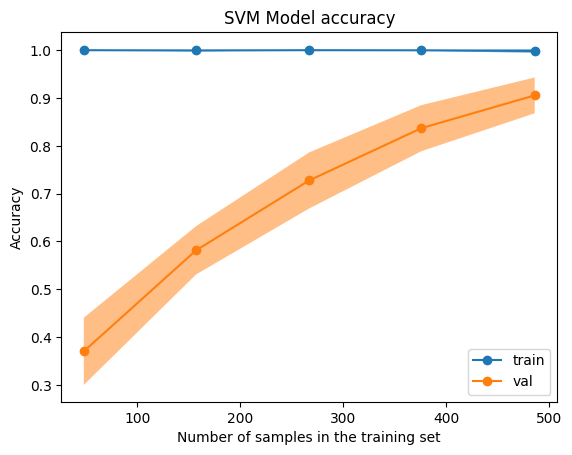

In [78]:
fig, ax = plt.subplots()
lc = LearningCurveDisplay(train_sizes=display.train_sizes, train_scores=display.train_scores,
                    test_scores=display.test_scores, score_name="Accuracy")
lc.plot(score_type="both", line_kw={"marker": "o"}, std_display_style="fill_between", ax=ax)
ax.legend(["train","val"])
ax.set_title("SVM Model accuracy")
fig.savefig("SVM_accuracy.png")